In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from scipy import stats
from scipy.stats import norm,skew
import warnings
from sklearn.preprocessing import RobustScaler
warnings.filterwarnings("ignore")
%matplotlib inline

# 讀取數據
train = pd.read_csv(r"C:\Users\rex\Desktop\賴老師連續流\part1\無氣提.csv") 

print (train)
train.head(5)



     Days    pH  Temp CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0       0  7.03  35.0                     -          NaN                  NaN   
1       1  7.08  35.0                   43%        12.47                  NaN   
2       2  7.22  35.0                   53%        12.47               108.97   
3       3  7.22  35.0                   50%        12.47                  NaN   
4       4  7.24  35.0                   49%        12.47               108.97   
..    ...   ...   ...                   ...          ...                  ...   
204   223  7.29  34.0                   70%        14.43               128.50   
205   224  7.15  35.0                   68%        14.43                  NaN   
206   225  7.31  35.0                   69%        14.43               128.50   
207   226  7.29  35.0                   69%        14.43                  NaN   
208   227   NaN   NaN                   NaN          NaN                  NaN   

     Influent SCOD(g/L)  SC

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),...,TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0,7.03,35.0,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,1,7.08,35.0,43%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.27,107.0,0.63,251.0
2,2,7.22,35.0,53%,12.47,108.97,16.41,16.41,74.94,31.0,...,60.37,40.57,67%,44.0,38.0,2.17,0.26,106.0,0.50,202.0
3,3,7.22,35.0,50%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.23,91.0,0.45,181.0
4,4,7.24,35.0,49%,12.47,108.97,16.41,17.33,61.65,43.0,...,47.85,30.82,64%,56.0,53.0,2.17,0.16,66.0,0.33,134.0


In [2]:
test = pd.read_csv(r"C:\Users\rex\Desktop\賴老師連續流\part1\氣提.csv")

print (test)
test.head(5)

     Days    pH  Temp CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0       0  6.99  35.0                     -          NaN                  NaN   
1       1  7.30  35.0                   59%        12.47                  NaN   
2       2  7.27  35.0                   63%        12.47               108.97   
3       3  7.28  35.0                   56%        12.47                  NaN   
4       4  7.22  35.0                   59%        12.47               108.97   
..    ...   ...   ...                   ...          ...                  ...   
204   223  7.40  35.0                   68%        14.43               128.50   
205   224  7.38  35.0                   70%        14.43                  NaN   
206   225  7.39  24.0                   73%        14.43               128.50   
207   226  7.34  35.0                   68%        14.43                  NaN   
208   227   NaN   NaN                   NaN          NaN               128.50   

     Influent SCOD(g/L)  SC

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),...,TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0,6.99,35.0,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,1,7.30,35.0,59%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.37,149.0,0.63,251.0
2,2,7.27,35.0,63%,12.47,108.97,16.41,13.05,70.66,35.0,...,28.02,17.5,62%,74.0,73.0,2.17,0.12,47.0,0.19,74.0
3,3,7.28,35.0,56%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.13,52.0,0.23,93.0
4,4,7.22,35.0,59%,12.47,108.97,16.41,14.82,58.58,46.0,...,29.13,17.8,61%,73.0,73.0,2.17,0.12,47.0,0.20,79.0


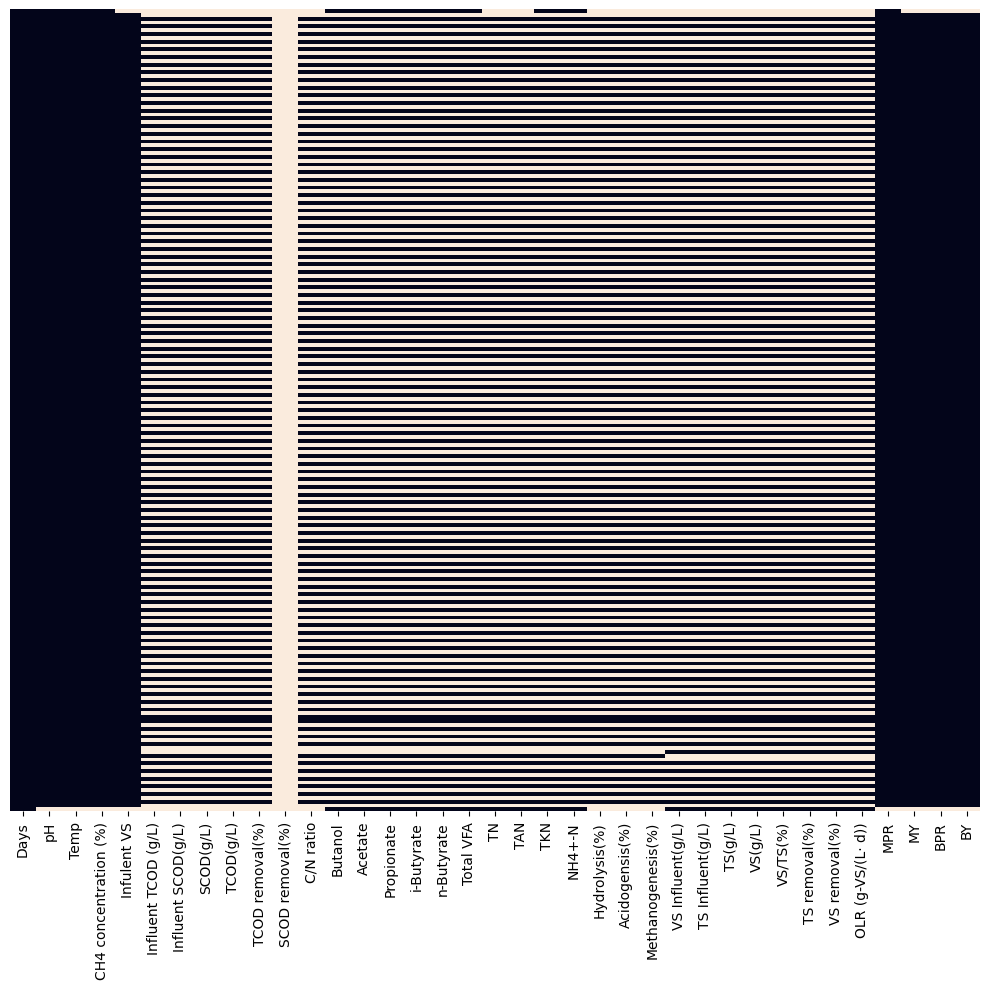

In [3]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [4]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(209, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   209 non-null    int64  
 1   pH                     208 non-null    float64
 2   Temp                   208 non-null    float64
 3   CH4 concentration (%)  208 non-null    object 
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    103 non-null    float64
 6   Influent SCOD(g/L)     103 non-null    float64
 7   SCOD(g/L)              103 non-null    float64
 8   TCOD(g/L)              103 non-null    float64
 9   TCOD removal(%)        103 non-null    float64
 10  SCOD removal(%)        0 non-null      float64
 11  C/N ratio              103 non-null    float64
 12  Butanol                105 non-null    float64
 13  Acetate                105 non-null    float64
 14  Propionate             105 non-null    float64
 

In [5]:

missing_ratio = train.isna().mean() * 100
# missing_ratio_df = pd.DataFrame({'Column': missing_ratio.index, 'Missing Ratio': missing_ratio.values})
# missing_ratio_df.to_excel('missing_ratio.xlsx', index=False)
print("Missing Value Ratios:")
for column, ratio in missing_ratio.iteritems():
    print(f"{column}: {ratio:.2f}%")


Missing Value Ratios:
Days: 0.00%
pH: 0.48%
Temp: 0.48%
CH4 concentration (%): 0.48%
Infulent VS: 0.96%
Influent TCOD (g/L): 50.72%
Influent SCOD(g/L): 50.72%
SCOD(g/L): 50.72%
TCOD(g/L): 50.72%
TCOD removal(%): 50.72%
SCOD removal(%): 100.00%
C/N ratio: 50.72%
Butanol: 49.76%
Acetate: 49.76%
Propionate: 49.76%
i-Butyrate: 49.76%
n-Butyrate: 49.76%
Total VFA: 49.76%
TN: 50.24%
TAN: 50.24%
TKN: 49.76%
NH4+-N: 49.76%
Hydrolysis(%): 50.72%
Acidogensis(%): 50.72%
Methanogenesis(%): 50.72%
VS Influent(g/L): 50.24%
TS Influent(g/L): 50.24%
TS(g/L): 50.24%
VS(g/L): 50.24%
VS/TS(%): 50.24%
TS removal(%): 50.24%
VS removal(%): 50.24%
OLR (g-VS/(L· d)): 50.24%
MPR: 0.48%
MY: 0.96%
BPR: 0.96%
BY: 0.96%


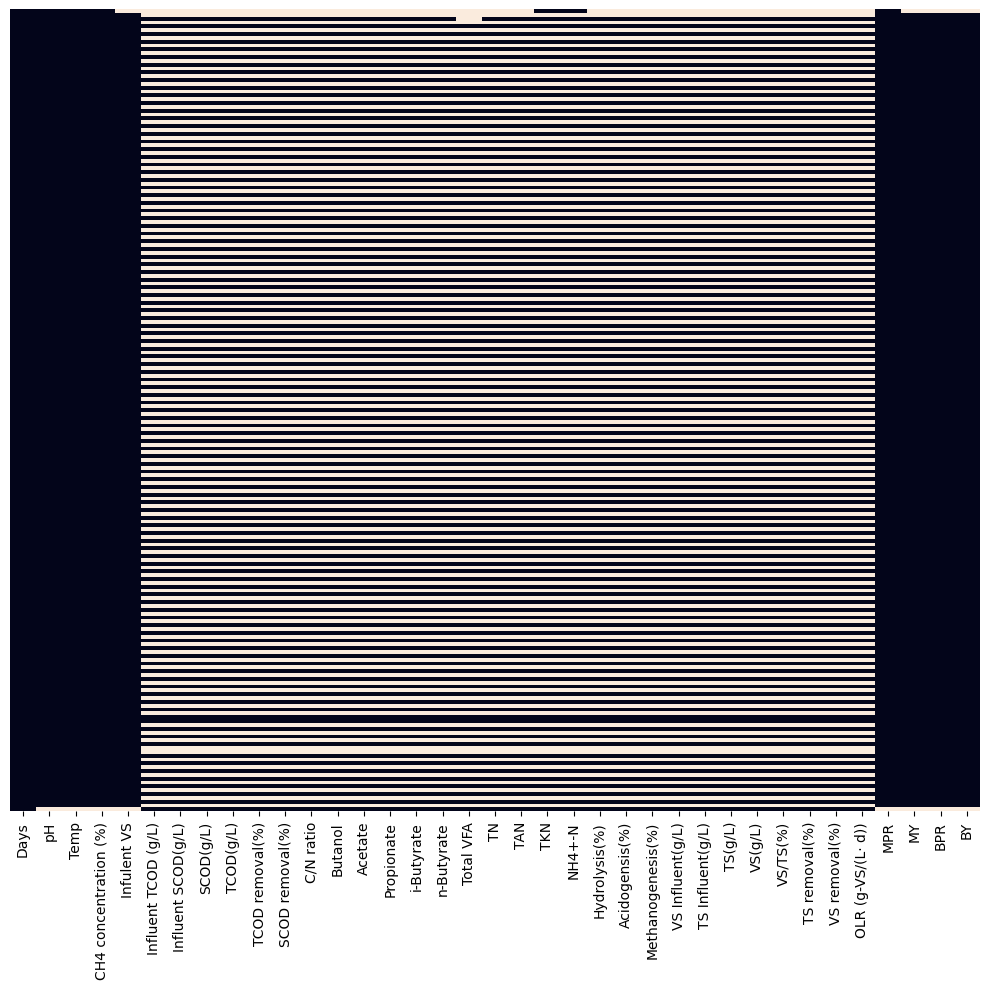

In [6]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [7]:
#看數據維度
print(test.shape)
#看數據訊息
test.info()

(209, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   209 non-null    int64  
 1   pH                     208 non-null    float64
 2   Temp                   208 non-null    float64
 3   CH4 concentration (%)  208 non-null    object 
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    104 non-null    float64
 6   Influent SCOD(g/L)     104 non-null    float64
 7   SCOD(g/L)              104 non-null    float64
 8   TCOD(g/L)              104 non-null    float64
 9   TCOD removal(%)        104 non-null    float64
 10  SCOD removal(%)        104 non-null    float64
 11  C/N ratio              104 non-null    float64
 12  Butanol                104 non-null    float64
 13  Acetate                104 non-null    float64
 14  Propionate             104 non-null    float64
 

In [8]:

missing_ratio_t = test.isna().mean() * 100
# missing_ratio_test = pd.DataFrame({'Column': missing_ratio_t.index, 'Missing Ratio': missing_ratio_t.values})
# missing_ratio_test.to_excel('missing_ratio_test.xlsx', index=False)
print("Missing Value Ratios:")
for column, ratio in missing_ratio_t.iteritems():
    print(f"{column}: {ratio:.2f}%")


Missing Value Ratios:
Days: 0.00%
pH: 0.48%
Temp: 0.48%
CH4 concentration (%): 0.48%
Infulent VS: 0.96%
Influent TCOD (g/L): 50.24%
Influent SCOD(g/L): 50.24%
SCOD(g/L): 50.24%
TCOD(g/L): 50.24%
TCOD removal(%): 50.24%
SCOD removal(%): 50.24%
C/N ratio: 50.24%
Butanol: 50.24%
Acetate: 50.24%
Propionate: 50.24%
i-Butyrate: 50.24%
n-Butyrate: 50.24%
Total VFA: 50.72%
TN: 50.24%
TAN: 50.24%
TKN: 49.76%
NH4+-N: 49.76%
Hydrolysis(%): 50.24%
Acidogensis(%): 50.24%
Methanogenesis(%): 50.24%
VS Influent(g/L): 50.24%
TS Influent(g/L): 50.24%
TS(g/L): 50.24%
VS(g/L): 50.24%
VS/TS(%): 50.24%
TS removal(%): 50.24%
VS removal(%): 50.24%
OLR (g-VS/(L· d)): 50.24%
MPR: 0.48%
MY: 0.96%
BPR: 0.96%
BY: 0.96%


In [9]:
print(train.columns)
print(test.columns)

Index(['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
       'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
       'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
       'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
       'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
       'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
       'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
       'MPR', 'MY', 'BPR', 'BY'],
      dtype='object')
Index(['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
       'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
       'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
       'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
       'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
       'VS Influent(g/L)', 'TS Influe

In [10]:
pd.set_option('display.max_columns', None)  # 顯示所有列
pd.set_option('display.max_rows', None)  # 顯示所有行
train.describe()

,Days,pH,Temp,Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),SCOD removal(%),C/N ratio,Butanol,Acetate,Propionate,i-Butyrate,n-Butyrate,Total VFA,TN,TAN,TKN,NH4+-N,Hydrolysis(%),Acidogensis(%),Methanogenesis(%),VS Influent(g/L),TS Influent(g/L),TS(g/L),VS(g/L),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
count,209.000000,208.000000,208.000000,207.000000,103.000000,103.000000,103.000000,103.000000,103.000000,0.0,103.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,104.000000,104.000000,105.000000,105.000000,103.000000,103.000000,103.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,208.000000,207.000000,207.000000,207.000000
mean,106.181818,7.410817,34.360577,12.809082,117.871456,16.547573,11.563204,46.978350,59.815534,NaN,10.370000,180.542857,1539.361905,323.161905,151.295238,288.333333,2302.209524,4659.942308,3132.769231,4661.714286,3117.000000,48.126214,49.398058,48.155340,83.126154,109.654038,43.496058,24.951731,60.346154,68.711538,2.765385,0.494038,195.149758,0.887005,349.657005
std,64.030833,0.068622,3.986667,0.641962,9.596070,4.978048,6.054846,11.844266,10.696112,NaN,3.324858,332.810122,1072.613210,213.942620,111.349582,309.774287,1367.424627,914.625520,758.296702,910.398747,771.748091,18.182452,16.210829,16.078702,14.656012,11.220153,8.426847,5.768627,6.757620,10.550547,0.483360,0.185793,71.047651,0.317708,125.399646
min,0.000000,7.030000,17.000000,12.470000,103.000000,8.000000,4.000000,20.180000,31.000000,NaN,4.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2353.000000,1419.000000,2353.000000,1419.000000,11.000000,13.000000,12.000000,60.100000,86.400000,21.850000,9.850000,40.000000,34.000000,2.000000,0.000000,46.000000,0.230000,92.000000
25%,52.000000,7.407500,35.000000,12.470000,108.970000,12.000000,6.240000,40.550000,54.500000,NaN,8.375000,0.000000,799.000000,194.000000,74.000000,98.000000,1386.000000,4209.000000,2558.500000,4244.000000,2500.000000,41.000000,42.500000,40.000000,66.600000,104.100000,40.385000,21.912500,56.000000,63.000000,2.220000,0.370000,145.000000,0.650000,249.500000
50%,104.000000,7.430000,35.000000,12.470000,119.000000,17.000000,9.550000,44.580000,60.000000,NaN,9.350000,79.000000,1206.000000,281.000000,132.000000,166.000000,1998.000000,4664.000000,3504.000000,4664.000000,3503.000000,51.000000,51.000000,49.000000,88.100000,109.500000,44.590000,24.995000,61.000000,70.000000,2.940000,0.510000,203.000000,0.900000,362.000000
75%,156.000000,7.450000,35.000000,13.280000,125.000000,20.000000,16.190000,55.165000,67.000000,NaN,11.115000,120.000000,2258.000000,411.000000,200.000000,270.000000,2777.000000,5158.500000,3732.500000,5141.000000,3731.000000,58.000000,58.000000,56.000000,94.500000,119.100000,46.470000,27.307500,65.000000,76.000000,3.150000,0.590000,237.000000,1.070000,430.000000
max,227.000000,7.620000,39.000000,14.430000,135.000000,24.640000,32.930000,76.020000,84.000000,NaN,19.460000,1521.000000,5479.000000,1014.000000,416.000000,1422.000000,6678.000000,6513.000000,3996.000000,6513.000000,3996.000000,88.000000,88.000000,85.000000,105.100000,124.200000,63.210000,40.570000,75.000000,89.000000,3.500000,0.940000,355.000000,1.630000,614.000000


In [11]:
pd.set_option('display.max_columns', None)  # 顯示所有列
pd.set_option('display.max_rows', None)  # 顯示所有行
test.describe()

,Days,pH,Temp,Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),SCOD removal(%),C/N ratio,Butanol,Acetate,Propionate,i-Butyrate,n-Butyrate,Total VFA,TN,TAN,TKN,NH4+-N,Hydrolysis(%),Acidogensis(%),Methanogenesis(%),VS Influent(g/L),TS Influent(g/L),TS(g/L),VS(g/L),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
count,209.000000,208.000000,208.000000,207.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,105.000000,105.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,208.000000,207.000000,207.000000,207.000000
mean,106.181818,7.419423,34.057692,12.809082,117.973654,16.465385,7.970385,43.401827,62.817308,48.125000,9.638942,35.903846,1544.480769,324.250000,125.278846,191.163462,2181.310680,4300.903846,2934.019231,4306.095238,2920.142857,45.567308,47.903846,46.807692,83.126154,109.654038,41.124038,25.289038,62.557692,68.567308,2.770385,0.463702,180.415459,0.832947,325.202899
std,64.030833,0.057008,3.907943,0.641962,9.606079,5.024230,3.122295,9.741465,9.318282,22.791877,2.807373,41.847044,805.266849,152.241106,51.309731,215.850996,952.562612,692.229570,708.172158,690.944330,718.960192,23.789842,21.488547,21.602803,14.656012,11.220153,8.677146,5.176546,7.606623,8.719763,0.488274,0.265534,103.495328,0.467316,182.888946
min,0.000000,6.990000,17.000000,12.470000,103.000000,8.000000,2.530000,19.250000,35.000000,-23.000000,4.710000,0.000000,297.000000,99.000000,27.000000,20.000000,658.000000,2227.000000,1045.000000,2227.000000,1045.000000,1.000000,9.000000,8.000000,60.100000,86.400000,19.290000,10.760000,41.000000,47.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,7.410000,35.000000,12.470000,108.970000,12.000000,5.465000,38.382500,56.000000,33.000000,7.882500,0.000000,837.000000,225.000000,84.500000,72.250000,1361.000000,4044.500000,2746.500000,4076.000000,2634.000000,24.250000,30.000000,28.500000,66.600000,104.100000,36.697500,22.547500,56.750000,62.000000,2.220000,0.200000,79.000000,0.365000,144.500000
50%,104.000000,7.430000,35.000000,12.470000,119.000000,17.000000,7.410000,42.360000,64.000000,52.000000,8.890000,0.000000,1437.000000,281.500000,124.000000,119.000000,2060.000000,4524.000000,3143.500000,4538.000000,3142.000000,55.000000,55.000000,55.000000,88.100000,109.500000,41.020000,25.335000,65.000000,69.000000,2.940000,0.550000,199.000000,1.010000,404.000000
75%,156.000000,7.450000,35.000000,13.280000,125.000000,20.000000,10.130000,48.622500,69.000000,68.000000,10.380000,74.250000,2159.250000,369.500000,176.250000,203.000000,3077.000000,4734.000000,3411.750000,4734.000000,3409.000000,60.000000,62.000000,62.000000,94.500000,119.100000,47.850000,30.000000,67.250000,74.250000,3.150000,0.672500,265.000000,1.200000,473.000000
max,227.000000,7.640000,36.000000,14.430000,135.000000,24.640000,15.230000,70.660000,85.000000,80.000000,18.340000,134.000000,3571.000000,867.000000,226.000000,958.000000,4639.000000,5183.000000,3863.000000,5183.000000,3863.000000,90.000000,89.000000,87.000000,105.100000,124.200000,55.370000,33.630000,78.000000,88.000000,3.500000,1.080000,407.000000,2.000000,754.000000


In [12]:
# ND轉換NA
train = train.replace("ND", pd.NA)
test = test.replace("ND" , pd.NA)

# 將百分比轉換為數值
percentage_cols = ["SCOD removal(%)", "TCOD removal(%)", "C/N ratio", "Hydrolysis(%)", "Acidogensis(%)", "Methanogenesis(%)", "VS/TS(%)", "TS removal(%)", "VS removal(%)", "CH4 concentration (%)"]
for col in percentage_cols:
    # 確保所有值為字串型態
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)
    
    # 如果該值包含數字和%，則將 "%" 字符去掉並轉換為浮點數；否則直接轉換為浮點數
    train[col] = train[col].apply(lambda x: float(x.replace("%", "")) / 100.0 if "%" in x else float(x) / 100.0 if x.replace(".", "").isdigit() else np.nan)
    test[col] = test[col].apply(lambda x: float(x.replace("%", "")) / 100.0 if "%" in x else float(x) / 100.0 if x.replace(".", "").isdigit() else np.nan)

# # 處理ND值，如果某個特徵有連續20個ND，就刪除該特徵
# features_to_drop = [column for column in train.columns if (train[column] == "ND").rolling(window=10).sum().max() >= 20]
# train = train.drop(columns=features_to_drop)

# 使用前後的值加總除以2進行插值
train = train.interpolate(method="linear")
test = test.interpolate(method="linear")

train["SCOD removal(%)"] = train["SCOD removal(%)"].fillna(0)

train = train.iloc[2:].reset_index(drop=True)
test = test.iloc[2:].reset_index(drop=True)

# train = train.interpolate(method="linear", limit_direction="both")
# test = test.interpolate(method="linear", limit_direction="backward")

test["Total VFA"] = test["Total VFA"].interpolate(method="linear", limit_direction="both")

# 找到缺失值的索引位置
missing_indexes = test.index[test["Total VFA"].isnull()]

# 對最前面的兩個連續缺失值進行填充
for index in missing_indexes:
    if index < 2:
        # 使用最接近的兩個非缺失值的平均值填充
        previous_value = test.loc[index-1, "Total VFA"]
        next_value = test.loc[index+1, "Total VFA"]
        average = np.mean([previous_value, next_value])
        test.loc[index, "Total VFA"] = average


#看數據維度
print(train.shape)
print(test.shape)


(207, 37)
(207, 37)


In [13]:
print (train)
train.head(5)

     Days    pH  Temp  CH4 concentration (%)  Infulent VS  \
0       2  7.22  35.0                   0.53        12.47   
1       3  7.22  35.0                   0.50        12.47   
2       4  7.24  35.0                   0.49        12.47   
3       5  7.24  35.0                   0.49        12.47   
4       6  7.25  35.0                   0.48        12.47   
5       7  7.29  35.0                   0.56        12.47   
6       8  7.29  35.0                   0.49        12.47   
7       9  7.24  35.0                   0.47        12.47   
8      10  7.25  35.0                   0.55        12.47   
9      11  7.38  35.0                   0.61        12.47   
10     12  7.33  35.0                   0.60        12.47   
11     13  7.34  35.0                   0.55        12.47   
12     14  7.30  35.0                   0.57        12.47   
13     15  7.40  35.0                   0.58        12.47   
14     16  7.44  35.0                   0.59        12.47   
15     17  7.40  35.0   

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),SCOD removal(%),C/N ratio,Butanol,Acetate,Propionate,i-Butyrate,n-Butyrate,Total VFA,TN,TAN,TKN,NH4+-N,Hydrolysis(%),Acidogensis(%),Methanogenesis(%),VS Influent(g/L),TS Influent(g/L),TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,2,7.22,35.0,0.53,12.47,108.97,16.41,16.41,74.940,0.31,0.0,0.1946,60.0,147.0,86.0,120.0,111.0,465.0,3852.0,2500.0,3852.0,2500.0,0.260,0.260,0.26,65.18,108.3,60.37,40.570,0.670,0.440,0.380,2.17,0.26,106.0,0.50,202.0
1,3,7.22,35.0,0.50,12.47,108.97,16.41,16.87,68.295,0.37,0.0,0.1785,52.0,463.5,158.5,121.5,441.5,1185.5,3824.0,2365.0,3824.0,2365.0,0.210,0.220,0.22,65.18,108.3,54.11,35.695,0.655,0.500,0.455,2.17,0.23,91.0,0.45,181.0
2,4,7.24,35.0,0.49,12.47,108.97,16.41,17.33,61.650,0.43,0.0,0.1624,44.0,780.0,231.0,123.0,772.0,1906.0,3796.0,2230.0,3796.0,2230.0,0.160,0.180,0.18,65.18,108.3,47.85,30.820,0.640,0.560,0.530,2.17,0.16,66.0,0.33,134.0
3,5,7.24,35.0,0.49,12.47,108.97,16.41,17.61,60.800,0.44,0.0,0.1763,22.0,723.0,212.5,140.0,718.5,1793.5,3474.0,2170.5,3474.0,2170.5,0.135,0.155,0.15,65.18,108.3,47.28,29.735,0.625,0.565,0.545,2.17,0.13,51.0,0.26,103.0
4,6,7.25,35.0,0.48,12.47,108.97,16.41,17.89,59.950,0.45,0.0,0.1902,0.0,666.0,194.0,157.0,665.0,1681.0,3152.0,2111.0,3152.0,2111.0,0.110,0.130,0.12,65.18,108.3,46.71,28.650,0.610,0.570,0.560,2.17,0.11,46.0,0.24,95.0


In [14]:
print (test)
test.head(5)

     Days    pH  Temp  CH4 concentration (%)  Infulent VS  \
0       2  7.27  35.0                   0.63        12.47   
1       3  7.28  35.0                   0.56        12.47   
2       4  7.22  35.0                   0.59        12.47   
3       5  7.25  35.0                   0.60        12.47   
4       6  7.23  35.0                   0.51        12.47   
5       7  7.25  35.0                   0.59        12.47   
6       8  7.22  35.0                   0.51        12.47   
7       9  7.38  35.0                   0.03        12.47   
8      10  7.40  35.0                   0.00        12.47   
9      11  7.36  35.0                   0.07        12.47   
10     12  7.24  35.0                   0.17        12.47   
11     13  7.29  35.0                   0.30        12.47   
12     14  7.35  35.0                   0.41        12.47   
13     15  7.39  35.0                   0.53        12.47   
14     16  7.40  35.0                   0.52        12.47   
15     17  7.40  35.0   

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),SCOD removal(%),C/N ratio,Butanol,Acetate,Propionate,i-Butyrate,n-Butyrate,Total VFA,TN,TAN,TKN,NH4+-N,Hydrolysis(%),Acidogensis(%),Methanogenesis(%),VS Influent(g/L),TS Influent(g/L),TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,2,7.27,35.0,0.63,12.47,108.97,16.41,13.050,70.660,0.350,0.200,0.18340,0.0,1219.0,219.0,193.0,958.0,2221.0,4958.0,2332.0,4958.0,2332.0,0.030,0.090,0.1,65.18,108.3,28.020,17.50,0.620,0.740,0.73,2.17,0.12,47.0,0.19,74.0
1,3,7.28,35.0,0.56,12.47,108.97,16.41,13.935,64.620,0.405,0.150,0.16885,0.0,1058.0,203.5,193.0,950.5,2221.0,4846.0,2224.0,4846.0,2224.0,0.040,0.100,0.1,65.18,108.3,28.575,17.65,0.615,0.735,0.73,2.17,0.13,52.0,0.23,93.0
2,4,7.22,35.0,0.59,12.47,108.97,16.41,14.820,58.580,0.460,0.100,0.15430,0.0,897.0,188.0,193.0,943.0,2221.0,4734.0,2116.0,4734.0,2116.0,0.050,0.110,0.1,65.18,108.3,29.130,17.80,0.610,0.730,0.73,2.17,0.12,47.0,0.20,79.0
3,5,7.25,35.0,0.60,12.47,108.97,16.41,13.585,55.805,0.485,0.175,0.16130,0.0,882.0,202.5,193.0,879.5,2157.0,4475.0,2064.5,4475.0,2064.5,0.035,0.105,0.1,65.18,108.3,29.155,17.61,0.605,0.730,0.73,2.17,0.10,42.0,0.17,70.0
4,6,7.23,35.0,0.51,12.47,108.97,16.41,12.350,53.030,0.510,0.250,0.16830,0.0,867.0,217.0,193.0,816.0,2093.0,4216.0,2013.0,4216.0,2013.0,0.020,0.100,0.1,65.18,108.3,29.180,17.42,0.600,0.730,0.73,2.17,0.09,38.0,0.18,74.0


In [15]:
# fig, ax = plt.subplots()  #fig表示新創建的數字(Figure)對象，ax表示新創建的子圖(subplot)
# ax.scatter(x = train['SCOD(g/L)'],y = train['MY'])   #繪製點散圖
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('SCOD(g/L)',fontsize = 13)
# plt.show()

In [16]:
# #異常值處理
# train = train.drop(train[(train['SCOD(g/L)']>30) & (train['MY']<200)].index)

# fig, ax = plt.subplots()
# ax.scatter(x = train['SCOD(g/L)'],y = train['MY'])
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('SCOD(g/L)',fontsize = 13)
# plt.show()

In [17]:
# fig, ax = plt.subplots()  #fig表示新創建的數字(Figure)對象，ax表示新創建的子圖(subplot)
# ax.scatter(x = train['Acetate'],y = train['MY'])   #繪製點散圖
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('Acetate',fontsize = 13)
# plt.show()

In [18]:
# #異常值處理
# train = train.drop(train[(train['Acetate']>5000) & (train['MY']<250)].index)

# fig, ax = plt.subplots()
# ax.scatter(x = train['Acetate'],y = train['MY'])
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('Acetate',fontsize = 13)
# plt.show()

In [19]:
# fig, ax = plt.subplots()  #fig表示新創建的數字(Figure)對象，ax表示新創建的子圖(subplot)
# ax.scatter(x = test['n-Butyrate'],y = test['MY'])   #繪製點散圖
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('n-Butyrate',fontsize = 13)
# plt.show()

In [20]:
# #異常值處理
# test = test.drop(test[(test['n-Butyrate']>838.7) & (test['MY']<100)].index)

# fig, ax = plt.subplots()
# ax.scatter(x = test['n-Butyrate'],y = test['MY'])
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('n-Butyrate',fontsize = 13)
# plt.show()

In [21]:
# # 使用線性插值來填充缺失的值
# train["MY"] = train["MY"].interpolate(method="linear", limit_direction="both")
# test["MY"] = test["MY"].interpolate(method="linear", limit_direction="both")


# train["CH4 concentration (%)"] = train["CH4 concentration (%)"].interpolate(method="linear", limit_direction="both")
# test["CH4 concentration (%)"] = test["CH4 concentration (%)"].interpolate(method="linear", limit_direction="both")


In [22]:
# # 找到Butanol列中的最低值
# butanol_min = train['Butanol'].min()
# butanol_min = test['Butanol'].min()

# # 將Butanol列中為0的值替換為最低值
# train.loc[train['Butanol'] == 0, 'Butanol'] = butanol_min
# test.loc[test['Butanol'] == 0, 'Butanol'] = butanol_min

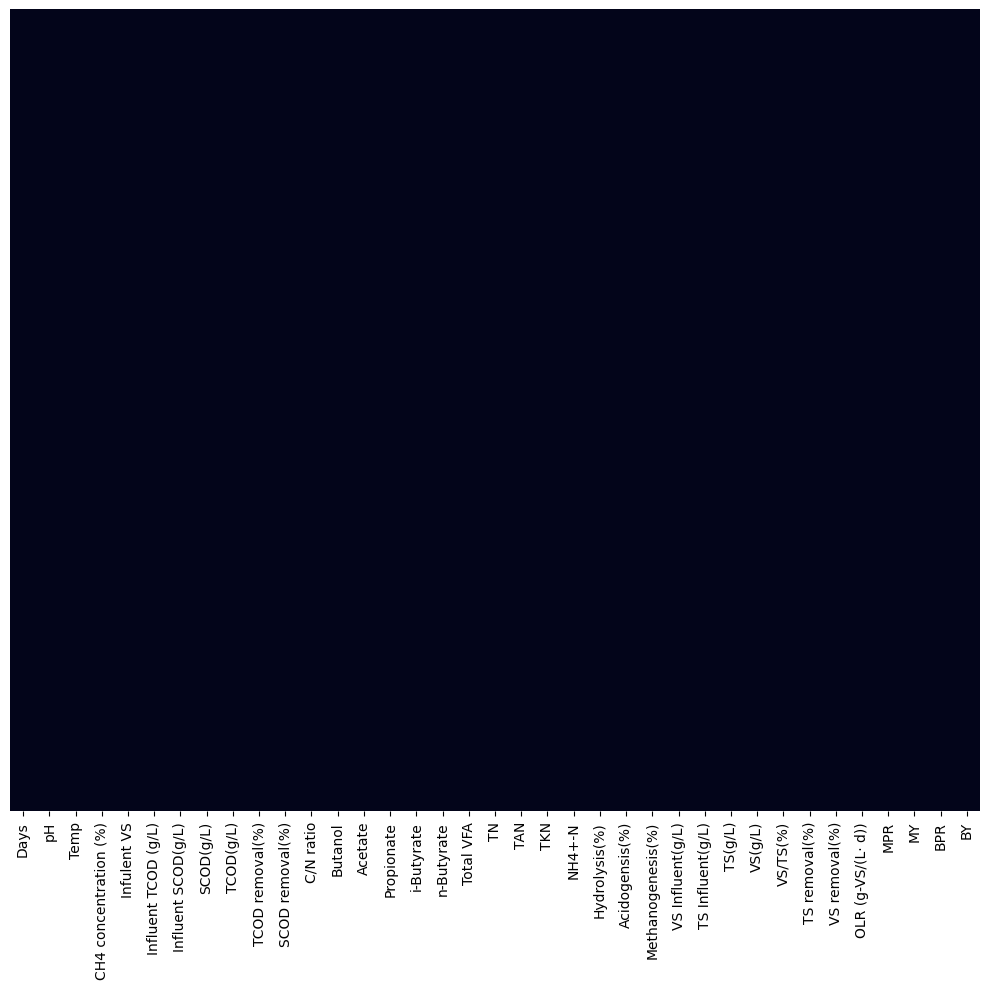

In [23]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [24]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(207, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   207 non-null    int64  
 1   pH                     207 non-null    float64
 2   Temp                   207 non-null    float64
 3   CH4 concentration (%)  207 non-null    float64
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    207 non-null    float64
 6   Influent SCOD(g/L)     207 non-null    float64
 7   SCOD(g/L)              207 non-null    float64
 8   TCOD(g/L)              207 non-null    float64
 9   TCOD removal(%)        207 non-null    float64
 10  SCOD removal(%)        207 non-null    float64
 11  C/N ratio              207 non-null    float64
 12  Butanol                207 non-null    float64
 13  Acetate                207 non-null    float64
 14  Propionate             207 non-null    float64
 

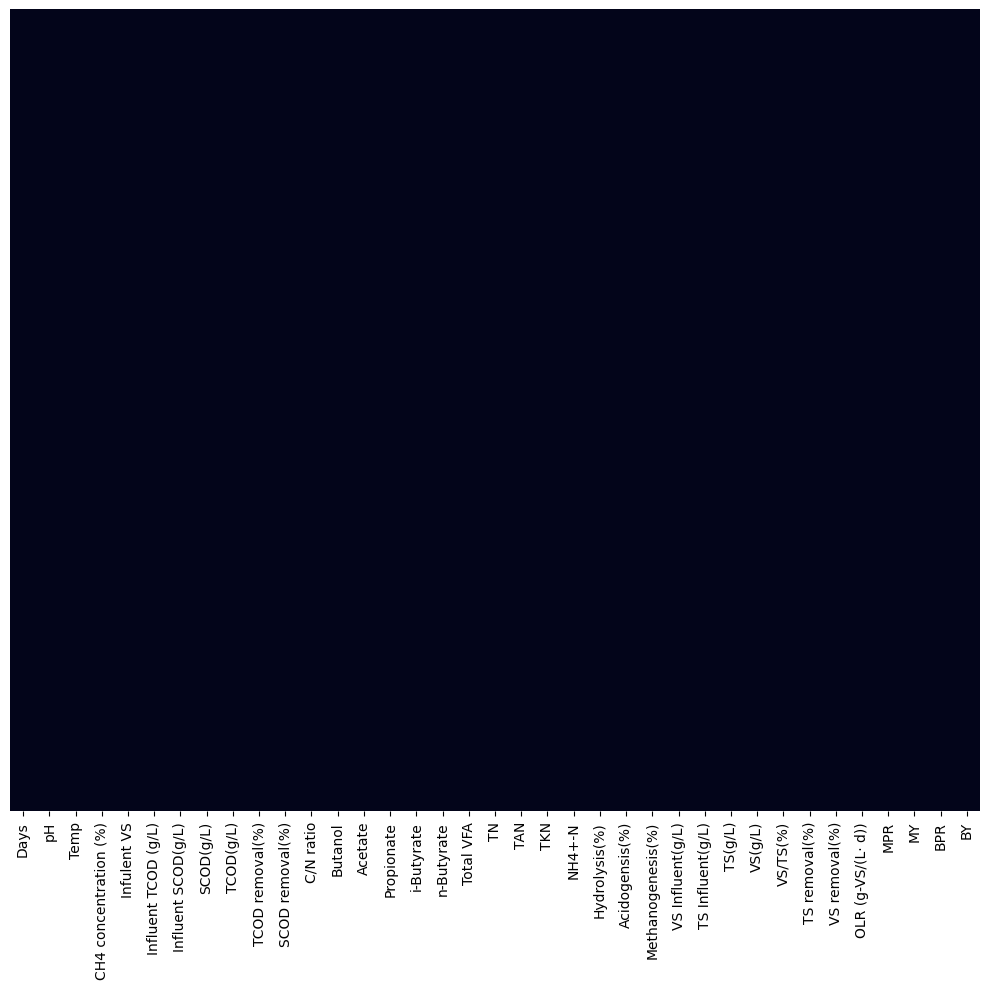

In [25]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [26]:
#看數據維度
print(test.shape)
#看數據訊息
test.info()

(207, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   207 non-null    int64  
 1   pH                     207 non-null    float64
 2   Temp                   207 non-null    float64
 3   CH4 concentration (%)  207 non-null    float64
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    207 non-null    float64
 6   Influent SCOD(g/L)     207 non-null    float64
 7   SCOD(g/L)              207 non-null    float64
 8   TCOD(g/L)              207 non-null    float64
 9   TCOD removal(%)        207 non-null    float64
 10  SCOD removal(%)        207 non-null    float64
 11  C/N ratio              207 non-null    float64
 12  Butanol                207 non-null    float64
 13  Acetate                207 non-null    float64
 14  Propionate             207 non-null    float64
 

In [27]:
# plt.figure(figsize=(8,5))
# plt.boxplot(train['CH4 concentration (%)'],showmeans=True)
# plt.title('CH4 concentration (%)')
# plt.show()


mu = 0.50 and sigma = 0.18


mu = 195.39 and sigma = 70.66


mu = 0.89 and sigma = 0.32


mu = 349.55 and sigma = 125.19



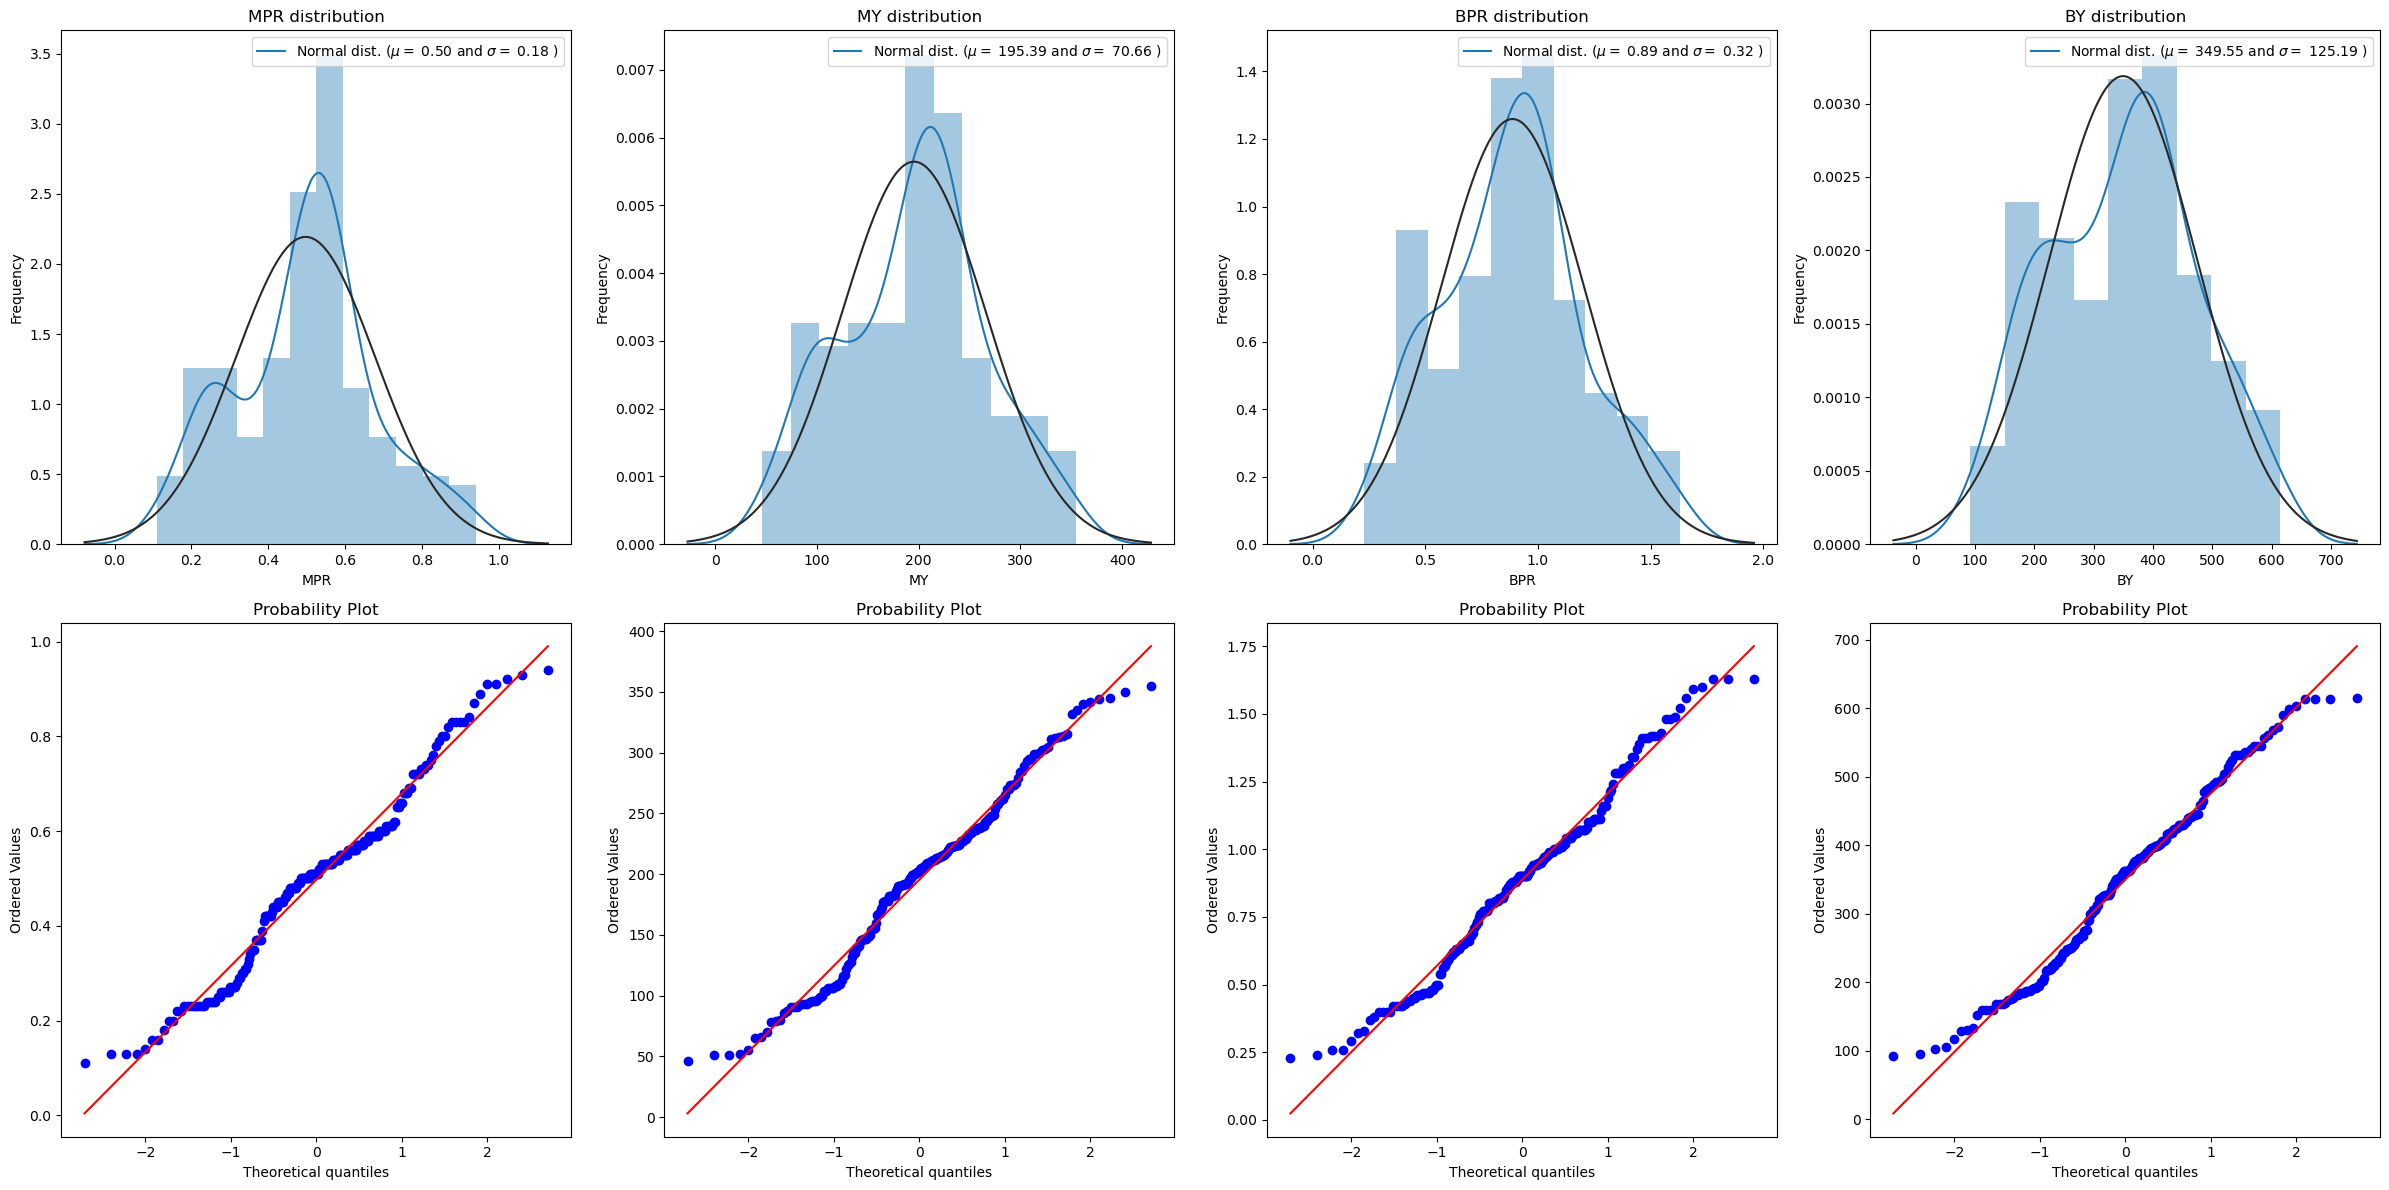

In [28]:

# 分析目標變量的分布，計算均值與標準差
targets = ["MPR", "MY", "BPR", "BY"]

fig, axs = plt.subplots(2, 4, figsize=(24, 12))  # 創建一個包含8個子圖的圖形窗口

for i, target in enumerate(targets):
    
    # 繪製概率密度函數和核密度估計的圖
    sns.distplot(train[target], fit=norm, ax=axs[0, i])   # 將圖繪製在適當的子圖上
    
    (mu, sigma) = norm.fit(train[target])   # 對變量進行最大似然估計
    print('\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
    axs[0, i].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    axs[0, i].set_ylabel('Frequency')
    axs[0, i].set_title('{} distribution'.format(target))
    
    # 繪製概率圖
    stats.probplot(train[target], plot=axs[1, i])   # 將圖繪製在適當的子圖上

plt.tight_layout()  # 自動調整子圖的佈局，使之填滿整個圖形窗口
plt.show()



mu = 0.50 and sigma = 0.18



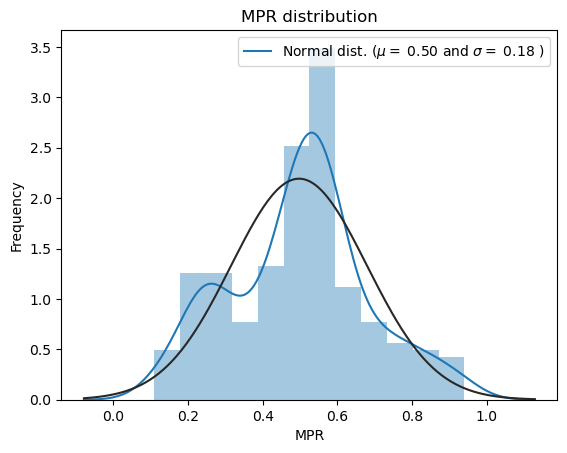

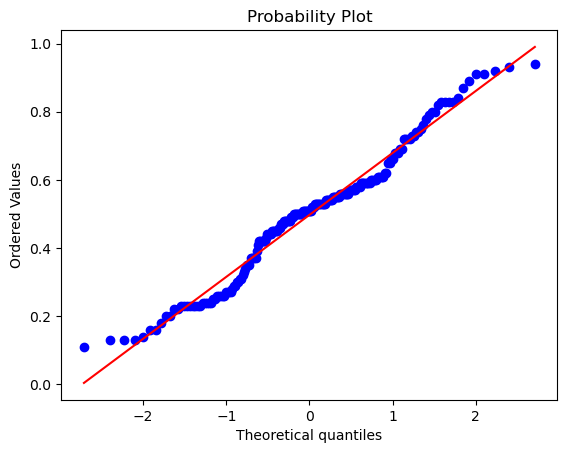


mu = 195.39 and sigma = 70.66



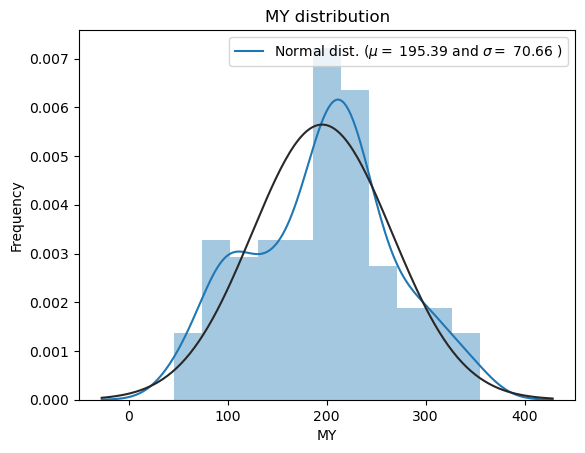

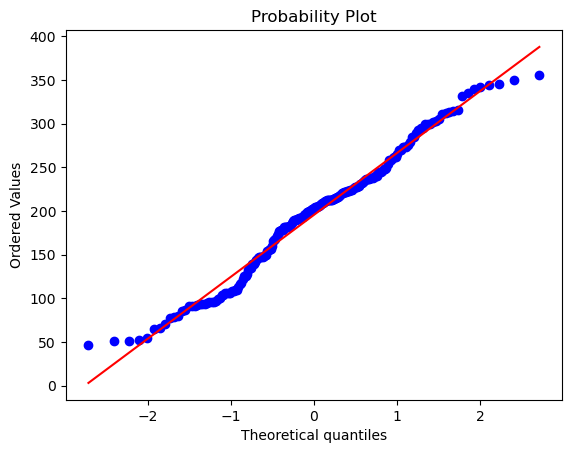


mu = 0.89 and sigma = 0.32



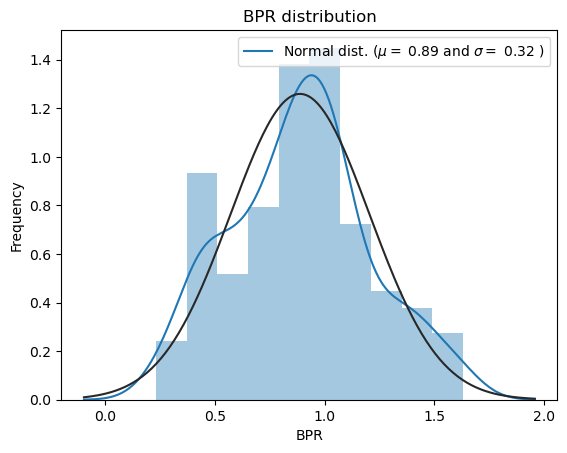

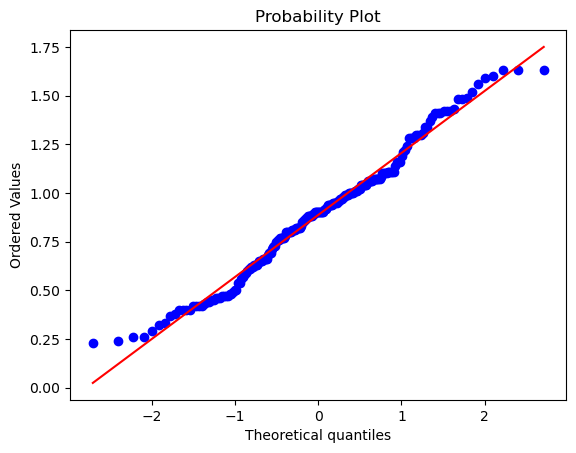


mu = 349.55 and sigma = 125.19



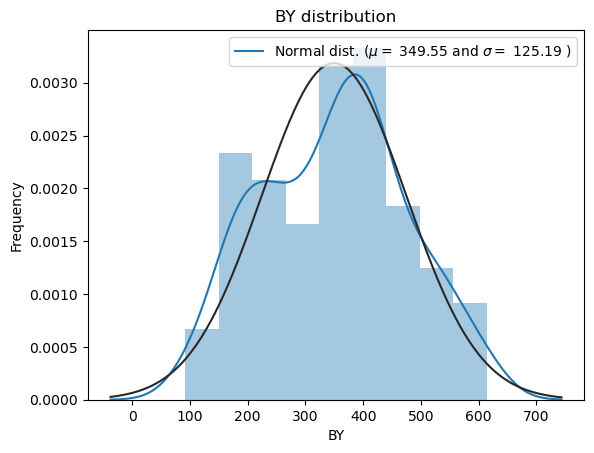

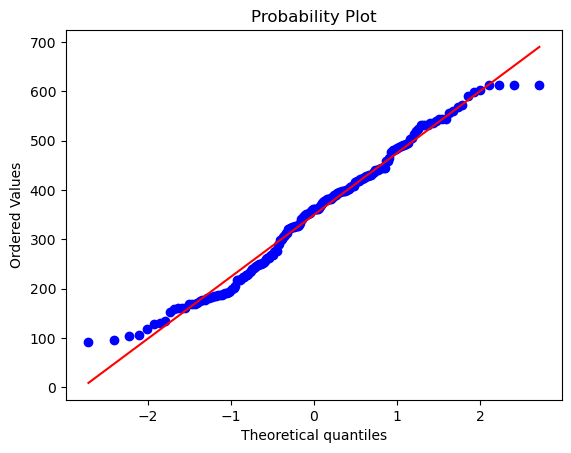

In [29]:
# 分析目標變量的分布，計算均值與標準差
targets = ["MPR", "MY", "BPR", "BY"]

for target in targets:
    
    sns.distplot(train[target], fit=norm)   #sns.distplot用於繪製一個變量的概率密度函數(PDF)和核密度估計(KDE)
    
    (mu, sigma) = norm.fit(train[target])   #norm.fit對SalePrice變量進行最大似然估計(MLE)，mu:正態分布的均值，sigma:正態分布的標準差。
    print('\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))   #\n換行，{:.2f}是一個格式化字符串，會被替換為mu和sigma的值，以保留兩位小數輸出。
    
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')    #plt.legend用於給圖標添加圖例，loc='best' 將圖例放置在當前圖形最佳位置，避免遮擋數據
    plt.ylabel('Frequency')
    plt.title('{} distribution'.format(target))   
    
    fig = plt.figure()  #創建一個新的圖形窗口
    res = stats.probplot(train[target], plot=plt)   #res表示用於比較的理論分佈，stats.probplot為一個概率圖函數，繪製數據樣本分佈與理論分佈之間的比較。
    
    plt.show()


mu = 0.50 and sigma = 0.18



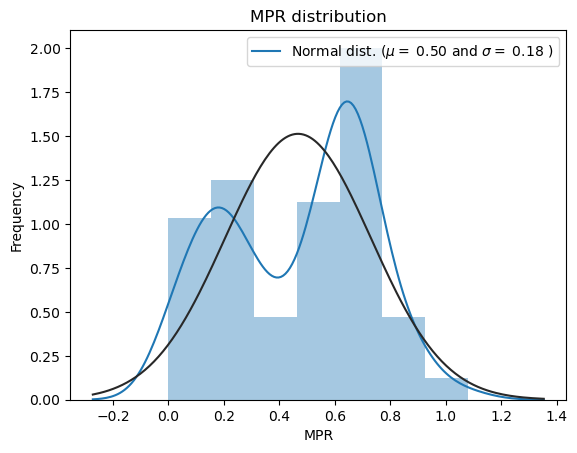

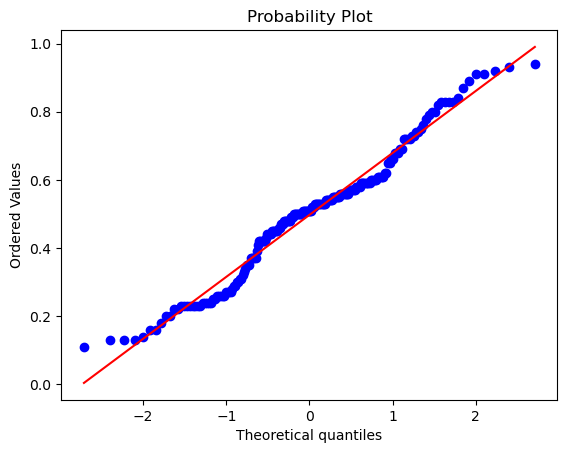


mu = 195.39 and sigma = 70.66



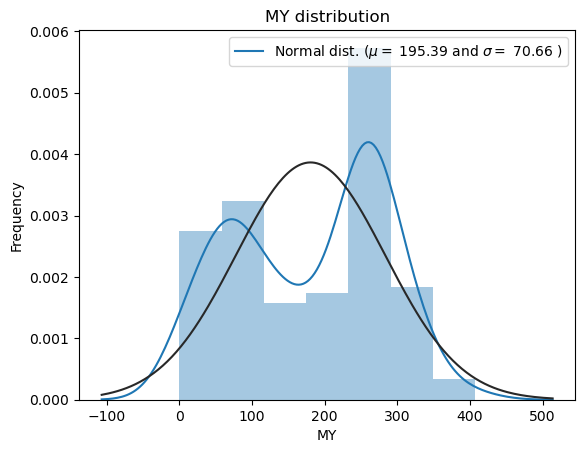

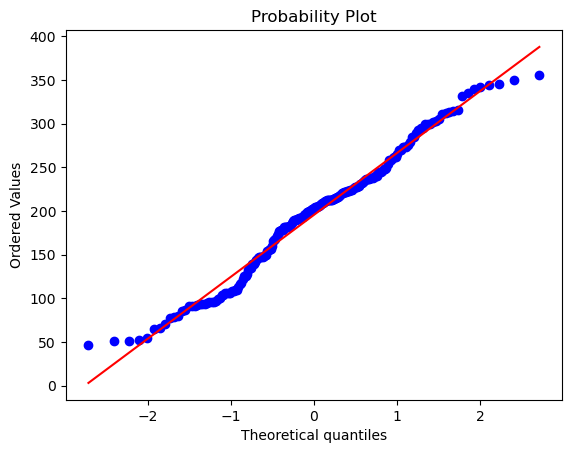


mu = 0.89 and sigma = 0.32



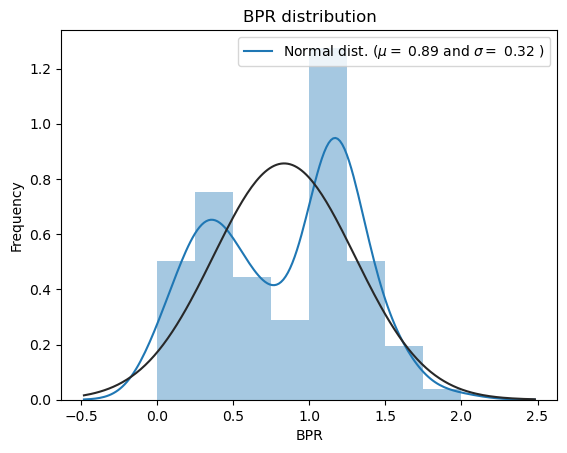

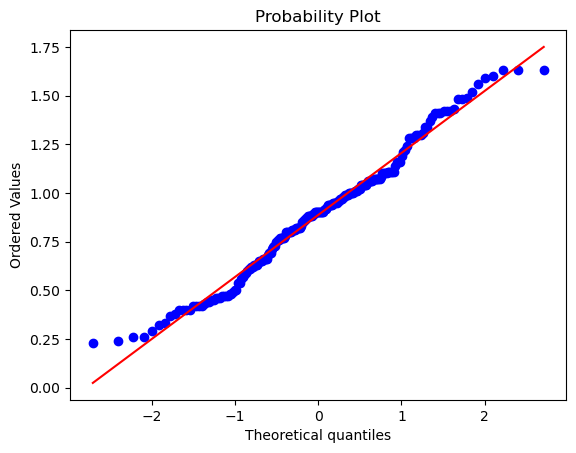


mu = 349.55 and sigma = 125.19



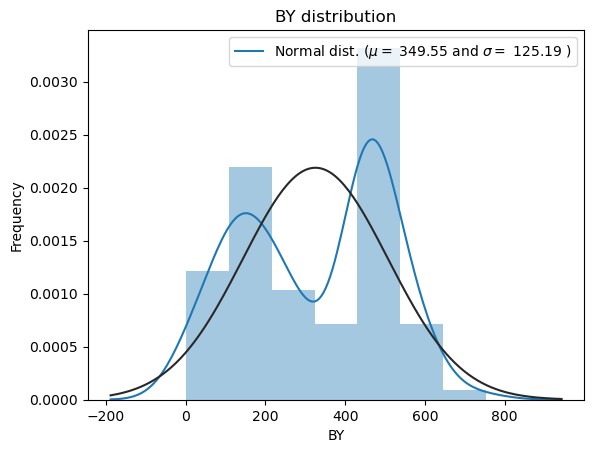

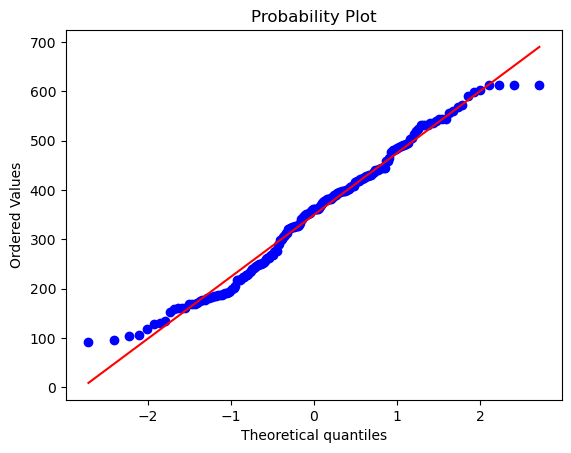

In [30]:
# 分析目標變量的分布，計算均值與標準差
targets = ["MPR", "MY", "BPR", "BY"]

for target in targets:
    
    sns.distplot(test[target], fit=norm)   #sns.distplot用於繪製一個變量的概率密度函數(PDF)和核密度估計(KDE)
    
    (mu, sigma) = norm.fit(train[target])   #norm.fit對SalePrice變量進行最大似然估計(MLE)，mu:正態分布的均值，sigma:正態分布的標準差。
    print('\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))   #\n換行，{:.2f}是一個格式化字符串，會被替換為mu和sigma的值，以保留兩位小數輸出。
    
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')    #plt.legend用於給圖標添加圖例，loc='best' 將圖例放置在當前圖形最佳位置，避免遮擋數據
    plt.ylabel('Frequency')
    plt.title('{} distribution'.format(target))   
    
    fig = plt.figure()  #創建一個新的圖形窗口
    res = stats.probplot(train[target], plot=plt)   #res表示用於比較的理論分佈，stats.probplot為一個概率圖函數，繪製數據樣本分佈與理論分佈之間的比較。
    
    plt.show()

In [31]:
# # log對數變換
# train["MPR"] = np.log1p(train["MPR"])  #np.log1p函數將()變量中的所有值都加上1，然後取對數。可以有效的消除數據中的偏度和峰度。使其更接近正態分佈。

# sns.distplot(train["MPR"] , fit=norm); 
 
# (mu, sigma) = norm.fit(train['MPR'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
 
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('SCOD(g/L)')
# plt.title('MPR distribution')
# fig = plt.figure()
# res = stats.probplot(train['MPR'], plot=plt)
# plt.show()

In [32]:
#對分類變量編碼
from sklearn.preprocessing import LabelEncoder
cols = ('Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
                     'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
                     'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
                     'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
                     'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
                     'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
                     'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
                     'MPR', 'MY', 'BPR', 'BY')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))    

#查看數據維度        
print('Shape all_data: {}'.format(train.shape))
print('Shape all_data: {}'.format(test.shape))

Shape all_data: (207, 37)
Shape all_data: (207, 37)


In [33]:
##One-HotEncoder
# from sklearn.preprocessing import OneHotEncoder

# # 定義要進行 One-Hot 編碼的欄位
# columns_to_encode = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
#                      'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
#                      'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
#                      'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
#                      'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
#                      'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
#                      'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
#                      'MPR', 'MY', 'BPR', 'BY']

# # 初始化 One-Hot 編碼器
# encoder = OneHotEncoder()

# encoder = OneHotEncoder(handle_unknown='ignore')

# # 對 train 資料進行 One-Hot 編碼
# train_encoded = encoder.fit_transform(train[columns_to_encode])

# # 對 test 資料進行 One-Hot 編碼
# test_encoded = encoder.transform(test[columns_to_encode])

# # 檢查編碼後的資料維度
# print('編碼後訓練資料的維度:', train_encoded.shape)
# print('編碼後測試資料的維度:', test_encoded.shape)


In [34]:
p_values = []

# 只針對數值型欄位進行操作
for column in train.select_dtypes(include=[np.number]).columns:  
    # 處理NaN值
    train_col = train[column].dropna()
    test_col = test[column].dropna()
    
    # 檢查是否有足夠的樣本
    if len(train_col) < 2 or len(test_col) < 2:
        print(f"欄位 {column} 的數據不足以進行 t 檢定")
        continue
    
    # 使用t檢定比較每個變數
    t_stat, p_val = stats.ttest_ind(train_col, test_col)
    p_values.append(p_val)

# 使用 Bonferroni 方法進行多重比較校正
alpha = 0.05  # 顯著性水平
n_tests = len(p_values)
p_values_corrected = np.array(p_values) * n_tests  # 進行校正

# 打印每個變數及其經過校正的 p 值
for column, p_val in zip(train.select_dtypes(include=[np.number]).columns, p_values_corrected):
    is_significant = p_val < alpha  # 判斷是否顯著
    print(f'{column}: {"顯著" if is_significant else "不顯著"} (p-value: {p_val})')


Days: 不顯著 (p-value: 37.0)
pH: 不顯著 (p-value: 3.1377032669336744)
Temp: 不顯著 (p-value: 0.2519804686150077)
CH4 concentration (%): 顯著 (p-value: 1.809354288428082e-32)
Infulent VS: 不顯著 (p-value: 37.0)
Influent TCOD (g/L): 不顯著 (p-value: 37.0)
Influent SCOD(g/L): 不顯著 (p-value: 37.0)
SCOD(g/L): 不顯著 (p-value: 25.34717761125384)
TCOD(g/L): 不顯著 (p-value: 19.461729440244053)
TCOD removal(%): 不顯著 (p-value: 1.5925085987955476)
SCOD removal(%): 顯著 (p-value: 3.845315048044636e-95)
C/N ratio: 不顯著 (p-value: 24.105531809246653)
Butanol: 顯著 (p-value: 1.570407145927915e-17)
Acetate: 不顯著 (p-value: 0.21037368970175807)
Propionate: 不顯著 (p-value: 3.189829162330139)
i-Butyrate: 不顯著 (p-value: 0.08996728496667557)
n-Butyrate: 不顯著 (p-value: 0.41399564539066125)
Total VFA: 不顯著 (p-value: 23.582974248170455)
TN: 不顯著 (p-value: 0.3368898151709975)
TAN: 不顯著 (p-value: 4.326681196133178)
TKN: 不顯著 (p-value: 0.3368898151709975)
NH4+-N: 不顯著 (p-value: 4.326681196133178)
Hydrolysis(%): 顯著 (p-value: 2.1018696108853458e-08)
Acid

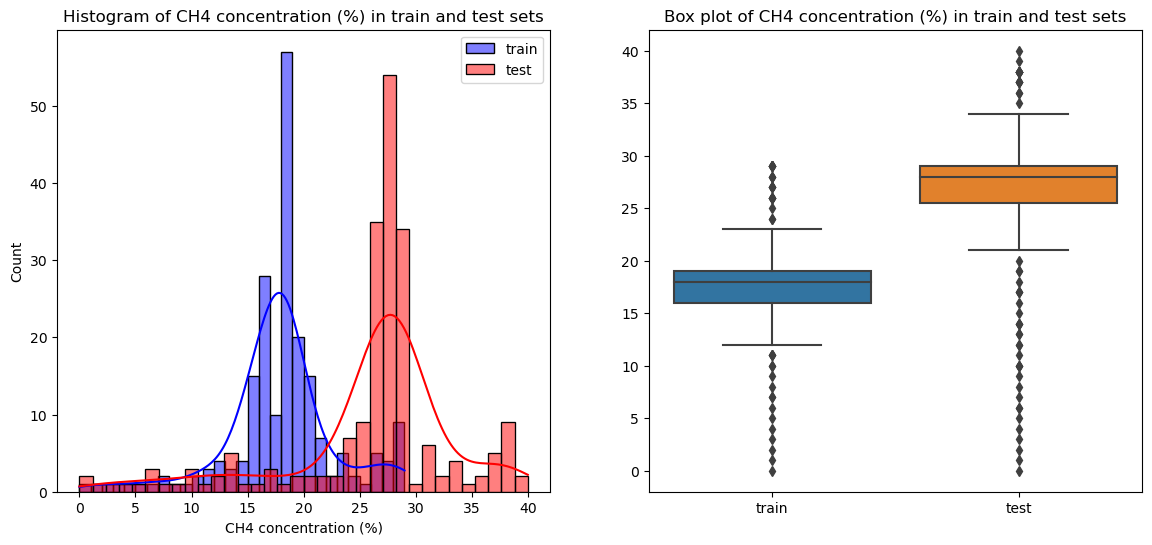

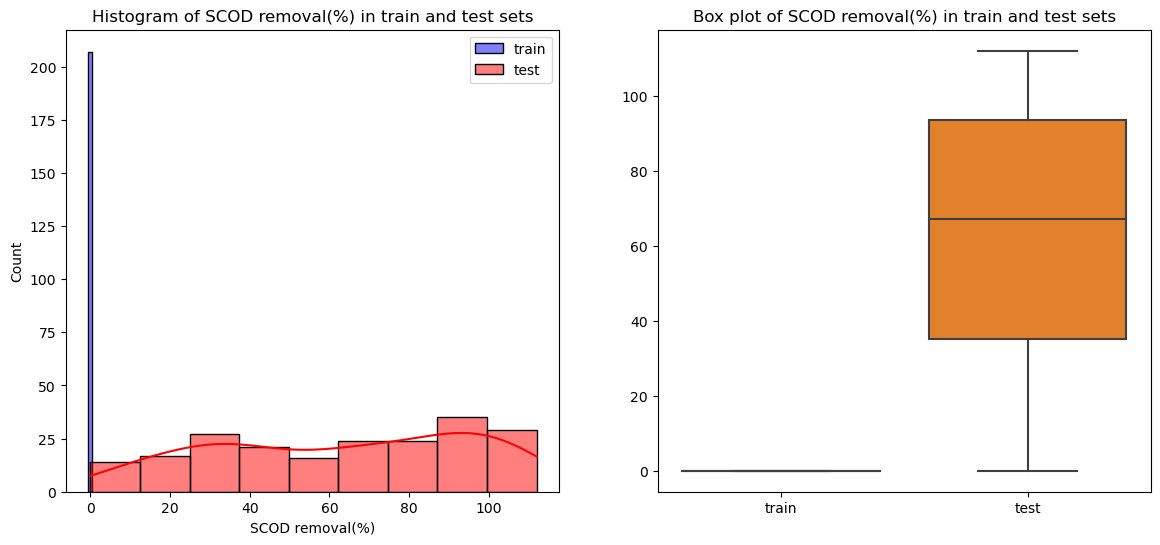

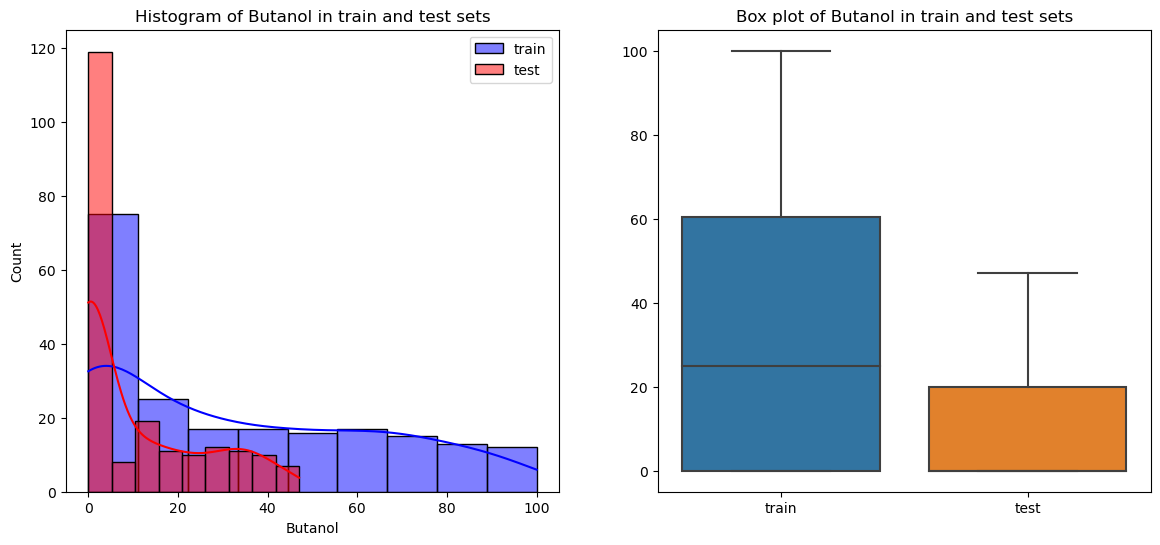

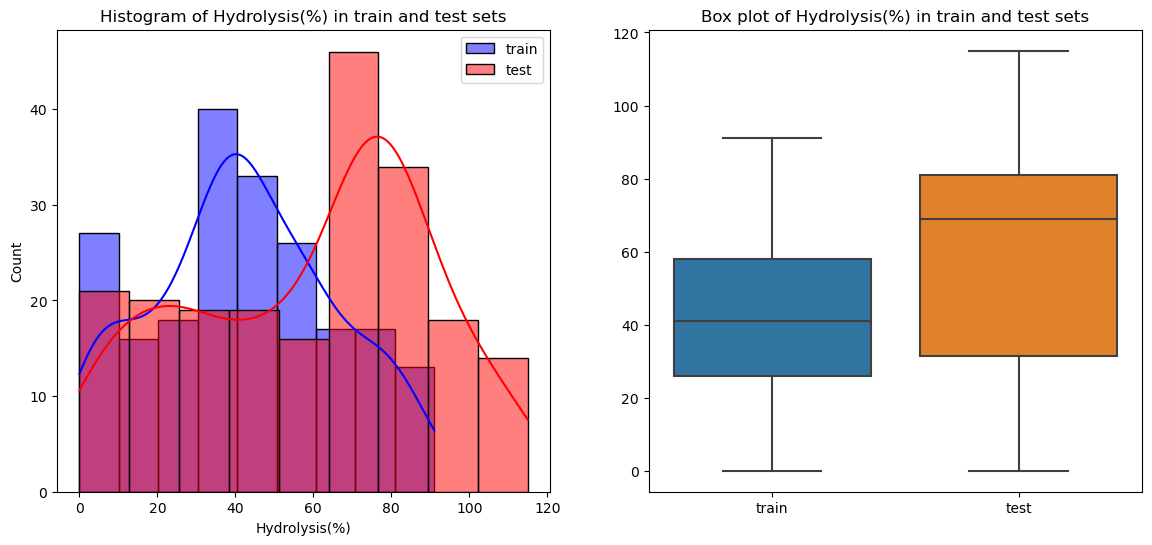

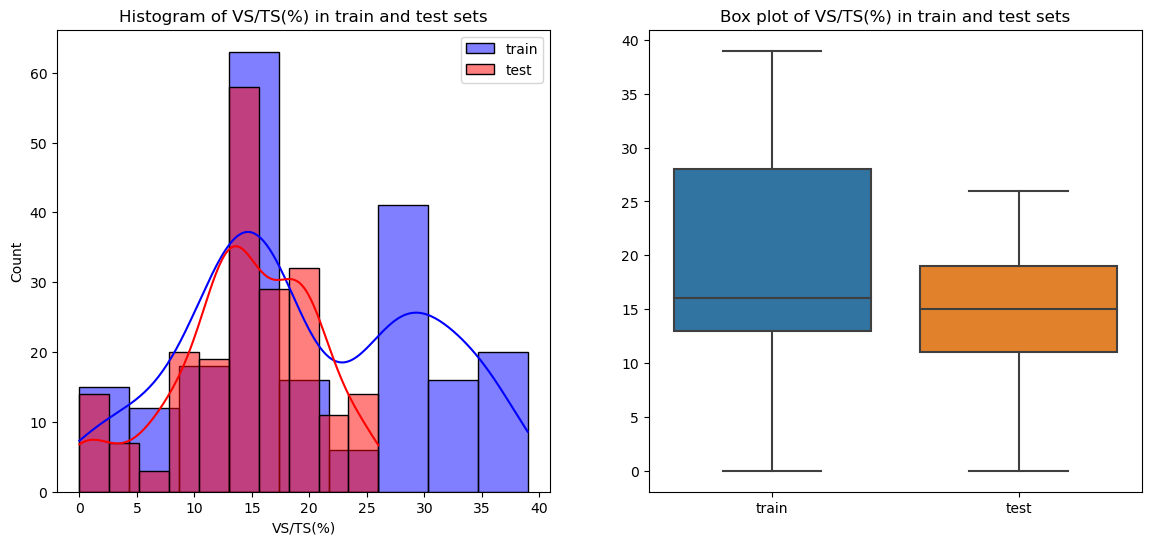

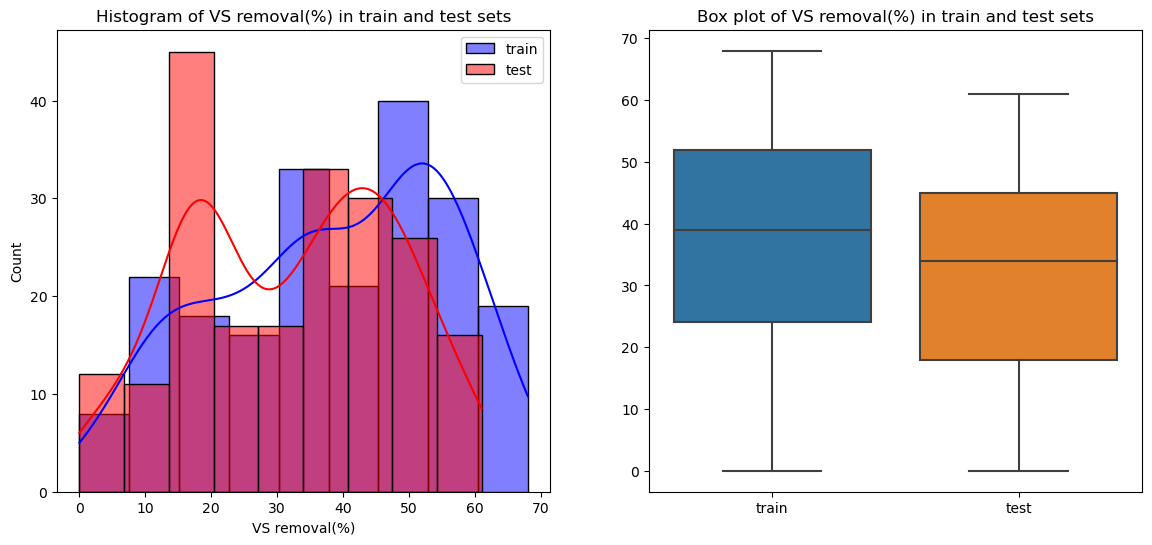

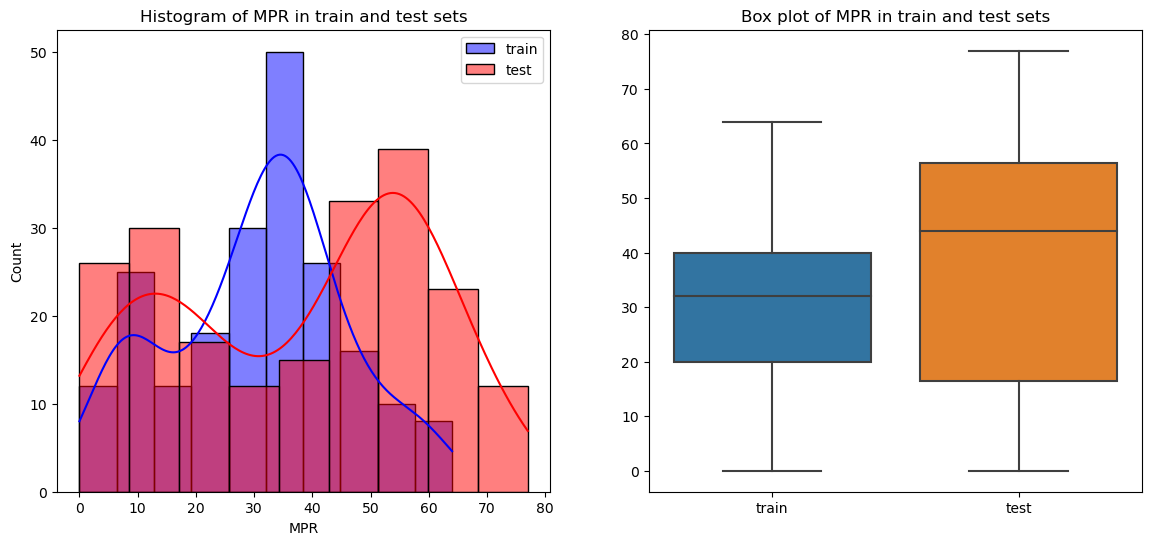

In [35]:
# 選擇要進一步研究的變量
variables = ['CH4 concentration (%)', 'SCOD removal(%)', 'Butanol', 'Hydrolysis(%)', 'VS/TS(%)', 'VS removal(%)', 'MPR']


# 為每個變量繪製直方圖和箱形圖
for var in variables:
    plt.figure(figsize=(14, 6))
    
    # 繪製直方圖
    plt.subplot(1, 2, 1)
    sns.histplot(train[var], color='blue', label='train', kde=True)
    sns.histplot(test[var], color='red', label='test', kde=True)
    plt.title(f'Histogram of {var} in train and test sets')
    plt.legend()

    # 繪製箱形圖
    plt.subplot(1, 2, 2)
    data = pd.concat([train[var], test[var]], axis=1)
    data.columns = ['train', 'test']
    sns.boxplot(data=data)
    plt.title(f'Box plot of {var} in train and test sets')

    plt.show()


In [36]:
# # 將顯著的變數作為特徵
# significant_features = ['Methanogenesis(%)', 'Acidogensis(%)', 'Hydrolysis(%)', 'VS Influent(g/L)', 'TS Influent(g/L)', 'OLR (g-VS/(L· d))']
# X_train = train[significant_features]
# y_train = train['MPR']  # 將'MPR'作為目標變數

# # 創建並訓練隨機森林回歸模型
# rf_model = RandomForestRegressor()
# rf_model.fit(X_train, y_train)

# # 在測試集上進行預測
# X_test = test[significant_features]
# y_test = test['MPR']
# y_pred = rf_model.predict(X_test)
# # 
# # 評估模型性能
# mse = mean_squared_error(y_test, y_pred)
# r2 = rf_model.score(X_test, y_test)

# print('均方誤差（MSE）：', mse)
# print('決定係數（R-squared）：', r2)


In [37]:
# #多重比較

# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# # 創建一個空的DataFrame來存儲結果
# tukey_results_df = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Difference', 'Lower CI', 'Upper CI', 'Reject Null'])

# # 進行所有變數之間的Tukey's HSD比較
# for i in range(len(train.select_dtypes(include=[np.number]).columns)):
#     for j in range(i+1, len(train.select_dtypes(include=[np.number]).columns)):
#         variable_1 = train.select_dtypes(include=[np.number]).columns[i]
#         variable_2 = train.select_dtypes(include=[np.number]).columns[j]
        
#         # 執行Tukey's HSD比較
#         tukey_results = pairwise_tukeyhsd(train[variable_1], train[variable_2])
        
#         # 提取重要結果
#         difference = tukey_results.meandiffs[0]
#         lower_ci = tukey_results.confint[0][0]
#         upper_ci = tukey_results.confint[0][1]
#         reject_null = tukey_results.reject[0]
        
#         # 將結果添加到DataFrame中
#         tukey_results_df = tukey_results_df.append({'Variable 1': variable_1,
#                                                     'Variable 2': variable_2,
#                                                     'Difference': difference,
#                                                     'Lower CI': lower_ci,
#                                                     'Upper CI': upper_ci,
#                                                     'Reject Null': reject_null},
#                                                    ignore_index=True)

# # 打印結果
# print(tukey_results_df)


In [38]:
#數值型數據
numeric_cols_train = train.columns[train.dtypes !='object']
numeric_cols_train

numeric_cols_test = test.columns[test.dtypes !='object']
numeric_cols_test

Index(['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
       'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
       'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
       'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
       'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
       'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
       'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
       'MPR', 'MY', 'BPR', 'BY'],
      dtype='object')

In [39]:
#標準化:（X-X'）/S  進行數據轉換  X 為原始值，X' 為平均值，S 為標準差
numeric_cols_test_mean =test.loc[: ,numeric_cols_test].mean() # mean() 函式計算數值型特徵的平均值
numeric_cols_test_std = test.loc[: ,numeric_cols_test].std() #std() 函式計算數值型特徵的標準差
test.loc[: ,numeric_cols_test] = (test.loc[: ,numeric_cols_test] - numeric_cols_test_mean)/numeric_cols_test_std #轉換後的數值型特徵資料儲存在 test 變數中

In [40]:
#標準化:（X-X'）/S  進行數據轉換  X 為原始值，X' 為平均值，S 為標準差
numeric_cols_train_mean =train.loc[: ,numeric_cols_train].mean() # mean() 函式計算數值型特徵的平均值
numeric_cols_train_std = train.loc[: ,numeric_cols_train].std() #std() 函式計算數值型特徵的標準差
train.loc[: ,numeric_cols_train] = (train.loc[: ,numeric_cols_train] - numeric_cols_train_mean)/numeric_cols_train_std #轉換後的數值型特徵資料儲存在 train 變數中

In [41]:
# # 選擇顯著差異的變數對進行進一步分析
# significant_pairs = tukey_results_df[tukey_results_df['Reject Null']]

# for idx, row in significant_pairs.iterrows():
#     variable_1 = row['Variable 1']
#     variable_2 = row['Variable 2']
    
#     # 可以進行進一步的分析，例如比較兩個變數對的分布或統計量
#     # 假設你想研究 SCOD(g/L) 和 TCOD(g/L) 這兩個變數對的差異
#     if variable_1 == 'SCOD(g/L)' and variable_2 == 'TCOD(g/L)':
#         data_variable_1 = train[variable_1]
#         data_variable_2 = train[variable_2]
        
#         # 可以繪製箱形圖或直方圖來比較兩個變數的分布
#         plt.figure()
#         plt.boxplot([data_variable_1, data_variable_2])
#         plt.xlabel('Variable')
#         plt.ylabel('Value')
#         plt.title('Comparison of SCOD(g/L) and TCOD(g/L)')
#         plt.xticks([1, 2], ['SCOD(g/L)', 'TCOD(g/L)'])
#         plt.show()
        
#         # 可以計算兩個變數的統計量，例如均值、標準差等
#         mean_variable_1 = data_variable_1.mean()
#         mean_variable_2 = data_variable_2.mean()
#         std_variable_1 = data_variable_1.std()
#         std_variable_2 = data_variable_2.std()
        
#         print(f"Variable 1: {variable_1}")
#         print(f"Mean: {mean_variable_1}, Standard Deviation: {std_variable_1}")
#         print(f"Variable 2: {variable_2}")
#         print(f"Mean: {mean_variable_2}, Standard Deviation: {std_variable_2}")


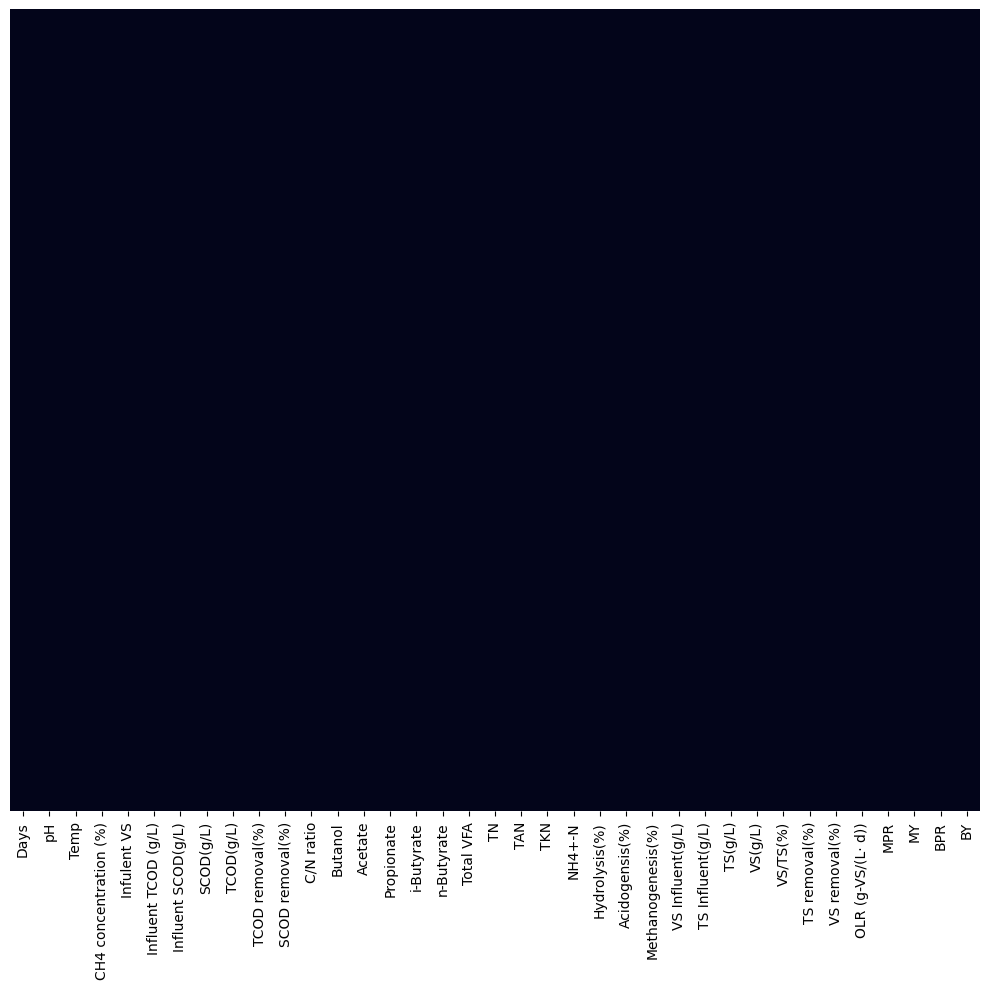

In [42]:
#isnull()看數據缺失值
train["SCOD removal(%)"] = train["SCOD removal(%)"].fillna(0)
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [43]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(207, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   207 non-null    float64
 1   pH                     207 non-null    float64
 2   Temp                   207 non-null    float64
 3   CH4 concentration (%)  207 non-null    float64
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    207 non-null    float64
 6   Influent SCOD(g/L)     207 non-null    float64
 7   SCOD(g/L)              207 non-null    float64
 8   TCOD(g/L)              207 non-null    float64
 9   TCOD removal(%)        207 non-null    float64
 10  SCOD removal(%)        207 non-null    float64
 11  C/N ratio              207 non-null    float64
 12  Butanol                207 non-null    float64
 13  Acetate                207 non-null    float64
 14  Propionate             207 non-null    float64
 

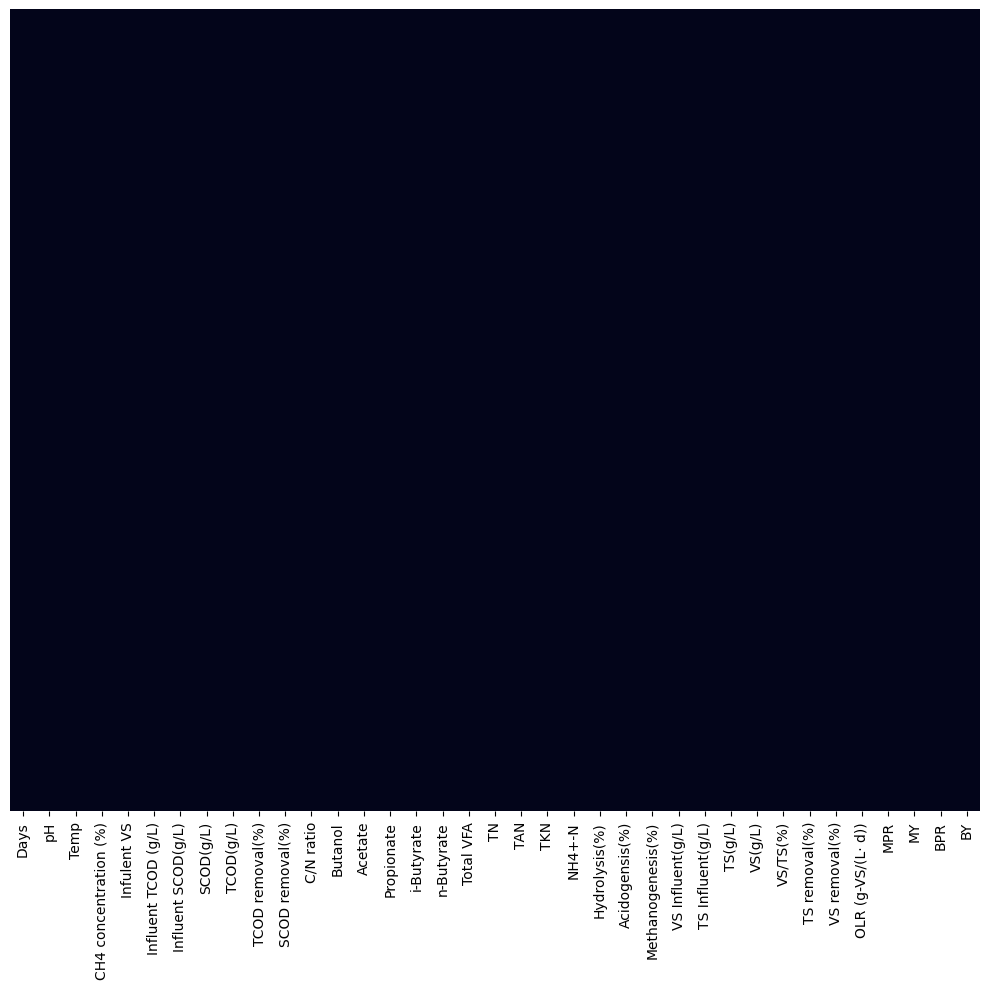

In [44]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [45]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(207, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   207 non-null    float64
 1   pH                     207 non-null    float64
 2   Temp                   207 non-null    float64
 3   CH4 concentration (%)  207 non-null    float64
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    207 non-null    float64
 6   Influent SCOD(g/L)     207 non-null    float64
 7   SCOD(g/L)              207 non-null    float64
 8   TCOD(g/L)              207 non-null    float64
 9   TCOD removal(%)        207 non-null    float64
 10  SCOD removal(%)        207 non-null    float64
 11  C/N ratio              207 non-null    float64
 12  Butanol                207 non-null    float64
 13  Acetate                207 non-null    float64
 14  Propionate             207 non-null    float64
 

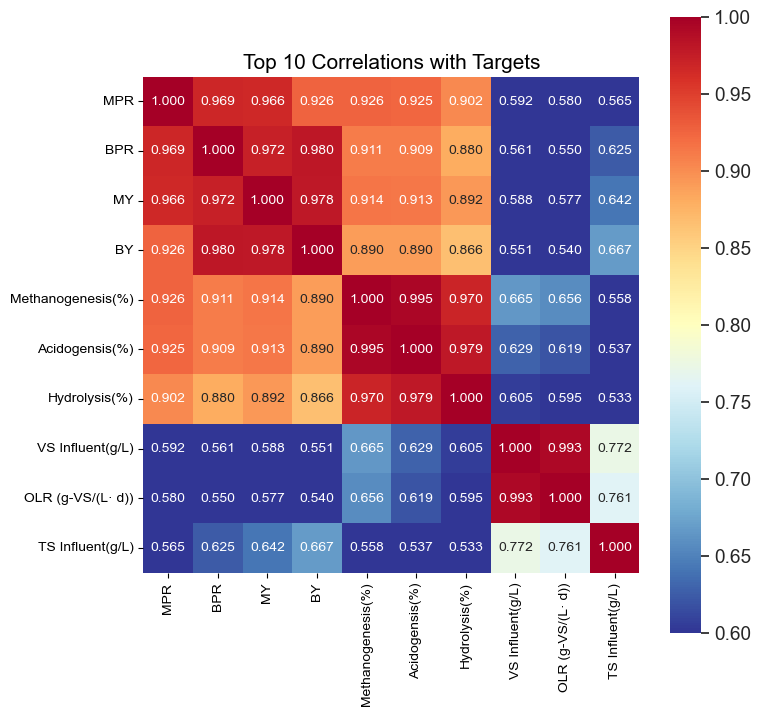

In [46]:
k = 10
corrmat = train.corr()
cols = corrmat.nlargest(k, targets)[targets].index
cm = np.corrcoef(train[cols].values.T)

fig, ax = plt.subplots(figsize=(8, 8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size':10},
            yticklabels=cols.values, xticklabels=cols.values, cmap='RdYlBu_r', vmin=0.6, vmax=1.0)
plt.title(f"Top {k} Correlations with Targets")
plt.show()


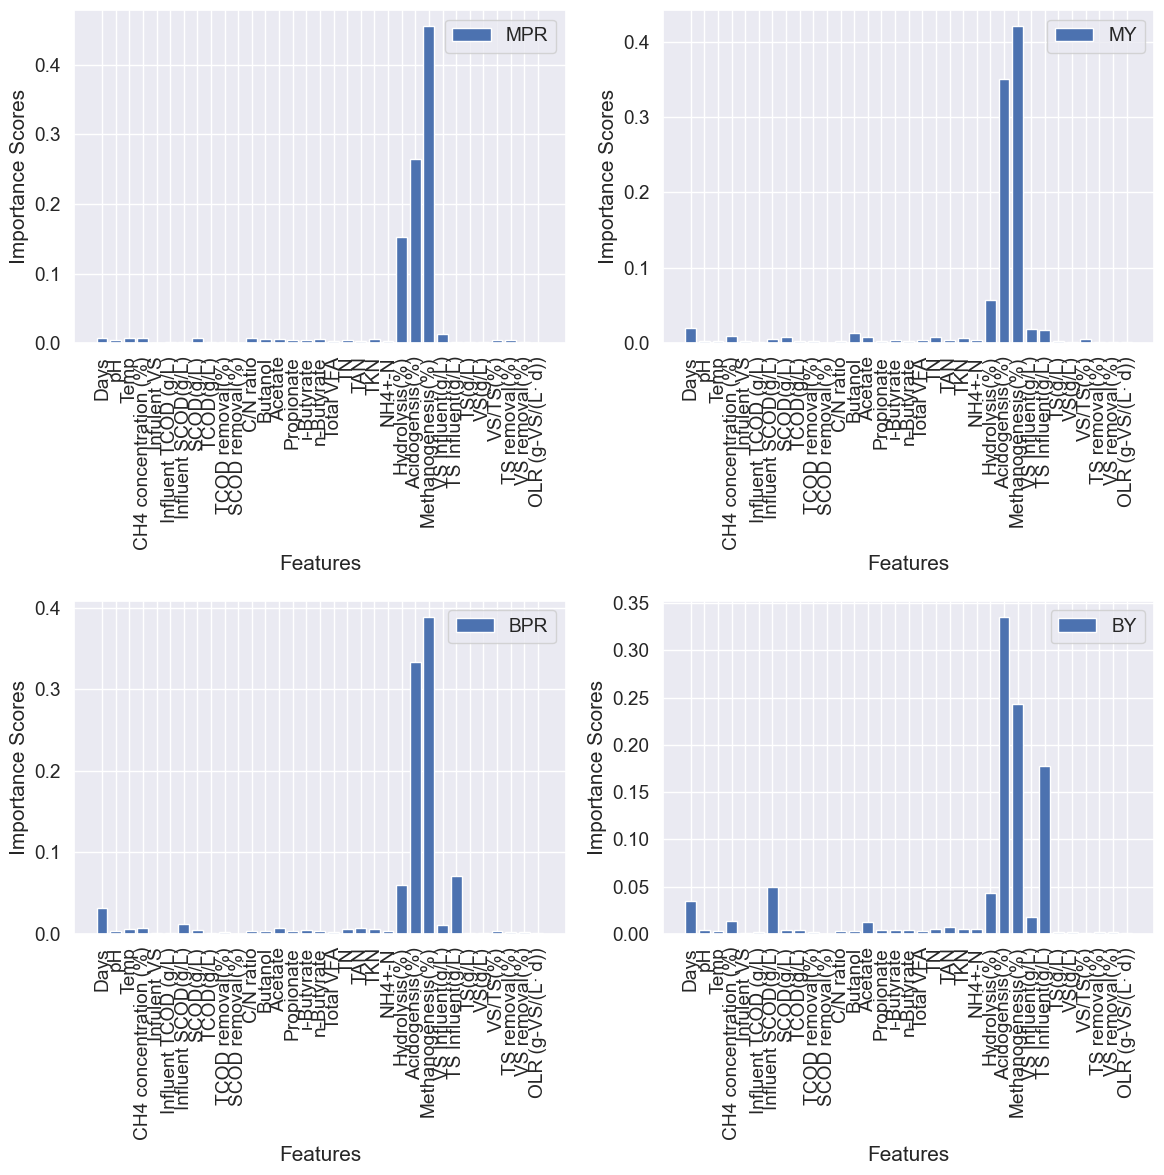

In [47]:
#隨機森林塞選變


# 準備特徵和目標變量
features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))']

targets = ['MPR', 'MY', 'BPR', 'BY']  # 您的目標變量

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, target in enumerate(targets):
    row = i // 2
    col = i % 2

    # 創建特徵和目標變量的數據集
    X = train[features]
    y = train[target]

    # 构建随機森林模型
    model = RandomForestRegressor(n_estimators=100)

    # 訓練模型
    model.fit(X, y)

    # 提取變量重要性
    importance_scores = model.feature_importances_

    # 可視化變量重要性
    axes[row, col].bar(features, importance_scores, label=target)
    axes[row, col].set_xlabel('Features')
    axes[row, col].set_ylabel('Importance Scores')
    axes[row, col].set_xticklabels(features, rotation=90)
    axes[row, col].legend()

plt.tight_layout()
plt.show()


In [48]:
# 將特徵名稱和重要性分數組成一個字典
importance_dict = dict(zip(features, importance_scores))

# 根據重要性分數進行排序
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# 提取前五個最重要的特徵變數
top_5_features = [feat for feat, _ in sorted_importance[:5]]

# 輸出前五個最重要的特徵變數
print("Top 5 most important features:")
for feature in top_5_features:
    print(feature)

Top 5 most important features:
Acidogensis(%)
Methanogenesis(%)
TS Influent(g/L)
Influent SCOD(g/L)
Hydrolysis(%)


In [49]:
# 將特徵進行數學轉換
train['Methanogenesis_Squared'] = np.square(train['Methanogenesis(%)']) #平方
train['Methanogenesis_SquareRoot'] = np.sqrt(train['Methanogenesis(%)']) #平方根
train['Methanogenesis_Log'] = np.log(train['Methanogenesis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

train['Acidogensis_Squared'] = np.square(train['Acidogensis(%)']) #平方
train['Acidogensis_SquareRoot'] = np.sqrt(train['Acidogensis(%)']) #平方根
train['Acidogensis_Log'] = np.log(train['Acidogensis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

train['Hydrolysis_Squared'] = np.square(train['Hydrolysis(%)'])  # 平方
train['Hydrolysis_SquareRoot'] = np.sqrt(train['Hydrolysis(%)'])  # 平方根
train['Hydrolysis_Log'] = np.log(train['Hydrolysis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

# 結合多個特徵來創建新的特徵
train['Interaction_Meth_Hydro'] = train['Methanogenesis(%)'] * train['Hydrolysis(%)'] #兩變數相乘
train['Interaction_Meth_Acido'] = train['Methanogenesis(%)'] * train['Acidogensis(%)'] #兩變數相乘
train['Interaction_Hydro_Acido'] = train['Hydrolysis(%)'] * train['Acidogensis(%)']  # 兩變數相乘
train['Sum_Meth_Hydro'] = train['Methanogenesis(%)'] + train['Hydrolysis(%)'] #兩變數相加
train['Sum_Meth_Acido'] = train['Methanogenesis(%)'] + train['Acidogensis(%)'] #兩變數相加
train['Sum_Hydro_Acido'] = train['Hydrolysis(%)'] + train['Acidogensis(%)']  # 兩變數相加
train['Ratio_Meth_Hydro'] = train['Methanogenesis(%)'] / (train['Hydrolysis(%)'] + 1)  # 除
train['Ratio_Meth_Acido'] = train['Methanogenesis(%)'] / (train['Acidogensis(%)'] + 1)  # 除
train['Ratio_Hydro_Acido'] = train['Hydrolysis(%)'] / (train['Acidogensis(%)'] + 1)  # 除
train.fillna(0, inplace=True)





# 檢查衍生特徵是否成功添加到數據集中
print(train.head())


       Days        pH      Temp  CH4 concentration (%)  Infulent VS  \
0 -1.719535 -3.052161 -0.089468              -0.560604    -0.556596   
1 -1.702840 -3.052161 -0.089468              -1.174598    -0.556596   
2 -1.686146 -2.855155 -0.089468              -1.379263    -0.556596   
3 -1.669451 -2.855155 -0.089468              -1.379263    -0.556596   
4 -1.652757 -2.658150 -0.089468              -1.583928    -0.556596   

   Influent TCOD (g/L)  Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  \
0            -1.012546           -0.375303   0.909867   1.777937   
1            -1.012546           -0.375303   0.949068   1.667665   
2            -1.012546           -0.375303   1.027471   1.226577   
3            -1.012546           -0.375303   1.066672   1.134684   
4            -1.012546           -0.375303   1.086273   1.061169   

   TCOD removal(%)  SCOD removal(%)  C/N ratio   Butanol   Acetate  \
0        -2.119577              0.0   1.747440 -0.576391 -1.766876   
1        -2.064925      

In [50]:
test['Methanogenesis_Squared'] = np.square(test['Methanogenesis(%)']) #平方
test['Methanogenesis_SquareRoot'] = np.sqrt(test['Methanogenesis(%)']) #平方根
test['Methanogenesis_Log'] = np.log(test['Methanogenesis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

test['Acidogensis_Squared'] = np.square(test['Acidogensis(%)']) #平方
test['Acidogensis_SquareRoot'] = np.sqrt(test['Acidogensis(%)']) #平方根
test['Acidogensis_Log'] = np.log(test['Acidogensis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

test['Hydrolysis_Squared'] = np.square(test['Hydrolysis(%)'])  # 平方
test['Hydrolysis_SquareRoot'] = np.sqrt(test['Hydrolysis(%)'])  # 平方根
test['Hydrolysis_Log'] = np.log(test['Hydrolysis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

# 結合多個特徵來創建新的特徵
test['Interaction_Meth_Hydro'] = test['Methanogenesis(%)'] * test['Hydrolysis(%)'] #兩變數相乘
test['Interaction_Meth_Acido'] = test['Methanogenesis(%)'] * test['Acidogensis(%)'] #兩變數相乘
test['Interaction_Hydro_Acido'] = test['Hydrolysis(%)'] * test['Acidogensis(%)']  # 兩變數相乘
test['Sum_Meth_Hydro'] = test['Methanogenesis(%)'] + test['Hydrolysis(%)'] #兩變數相加
test['Sum_Meth_Acido'] = test['Methanogenesis(%)'] + test['Acidogensis(%)'] #兩變數相加
test['Sum_Hydro_Acido'] = test['Hydrolysis(%)'] + test['Acidogensis(%)']  # 兩變數相加
test['Ratio_Meth_Hydro'] = test['Methanogenesis(%)'] / (test['Hydrolysis(%)'] + 1)  # 除
test['Ratio_Meth_Acido'] = test['Methanogenesis(%)'] / (test['Acidogensis(%)'] + 1)  # 除
test['Ratio_Hydro_Acido'] = test['Hydrolysis(%)'] / (test['Acidogensis(%)'] + 1)  # 除
test.fillna(0, inplace=True)


In [51]:
# # 確定目標變量和特徵變量
# targets = ["MPR", "MY", "BPR", "BY"]
# features = [col for col in train.columns if col not in targets]

In [52]:
# #熱圖查看數據相關性，數值越接近 1 或 -1 的變數對其相關性越高，0為無相關。
# for target in targets :
#     k = 10
#     corrmat = train.corr()
#     cols = corrmat.nlargest(k, target)[target].index
#     cm = np.corrcoef(train[cols].values.T)
    
#     fig, ax = plt.subplots(figsize=(8, 8))
#     sns.set(font_scale=1.25)
#     hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
#                 yticklabels=cols.values, xticklabels=cols.values)
#     plt.title(f"Top {k} Correlations with {target}")
#     plt.show()

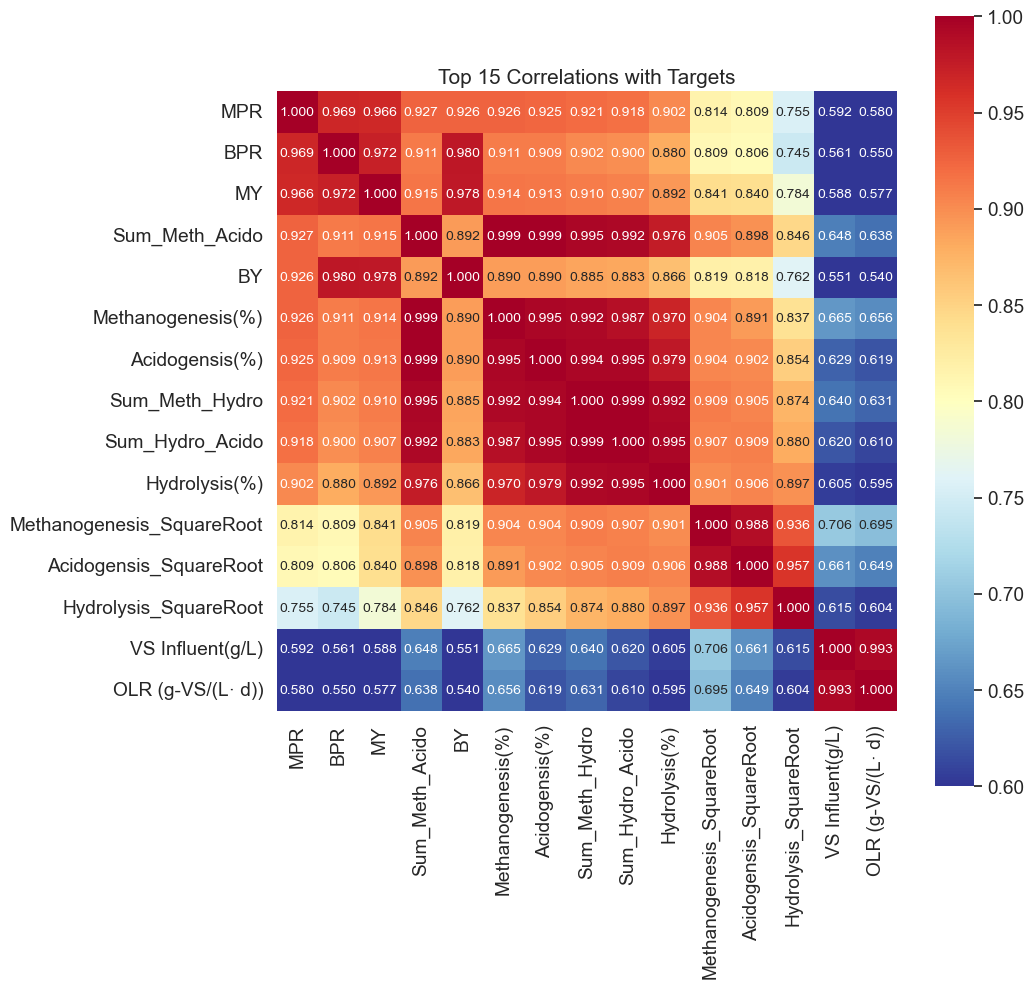

In [53]:
k = 15
corrmat = train.corr()
cols = corrmat.nlargest(k, targets)[targets].index
cm = np.corrcoef(train[cols].values.T)

fig, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size':10},
            yticklabels=cols.values, xticklabels=cols.values, cmap='RdYlBu_r', vmin=0.6, vmax=1.0)
plt.title(f"Top {k} Correlations with Targets")
plt.show()


In [54]:
# from sklearn.linear_model import Lasso
# from sklearn.feature_selection import SelectFromModel

# features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
#             'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
#             'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
#             'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
#             'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
#             'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
#             'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
#             'Methanogenesis_Squared', 'Methanogenesis_SquareRoot', 'Methanogenesis_Log',
#             'Interaction_Meth_Hydro', 'Sum_Meth_Hydro', 'Ratio_Meth_Hydro', 'Acidogensis_Squared',
#             'Acidogensis_SquareRoot', 'Acidogensis_Log', 'Interaction_Meth_Acido', 'Sum_Meth_Acido',
#             'Ratio_Meth_Acido']

# targets = ['MPR', 'MY', 'BPR', 'BY']  

# for target in targets:
#     print("Target:", target)

   
#     X = train[features]
#     y = train[target]

#     # 使用L1正則化的線性回歸模型（Lasso回歸）作为特徵選擇模型
#     lasso = Lasso(alpha=0.1)  
#     lasso.fit(X, y)

#     # 使用SelectFromModel選擇重要特徵
#     sfm = SelectFromModel(lasso)
#     X_selected = sfm.transform(X)

#     # 索引(特徵)
#     feature_indices = sfm.get_support(indices=True)

#     # 索引內的特徵名
#     selected_features = [features[i] for i in feature_indices]

#     print("Selected Features:", selected_features)


In [55]:
# #隨機森林塞選變
# from sklearn.ensemble import RandomForestRegressor

# # 準備特徵和目標變量
# features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
#             'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
#             'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
#             'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
#             'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
#             'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
#             'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))']

# targets = ['MPR', 'MY', 'BPR', 'BY']  # 您的目標變量

# # 創建特徵和目標變量的數據集
# X = test[features]
# y = test[targets]

# # 構建隨機森林模型
# model = RandomForestRegressor(n_estimators=100)

# # 訓練模型
# model.fit(X, y)

# # 提取變數重要性
# importance_scores = model.feature_importances_

# # 可視化變數重要性


# plt.bar(features, importance_scores)
# plt.xlabel('Features')
# plt.ylabel('Importance Scores')
# plt.xticks(rotation=90)
# plt.show()


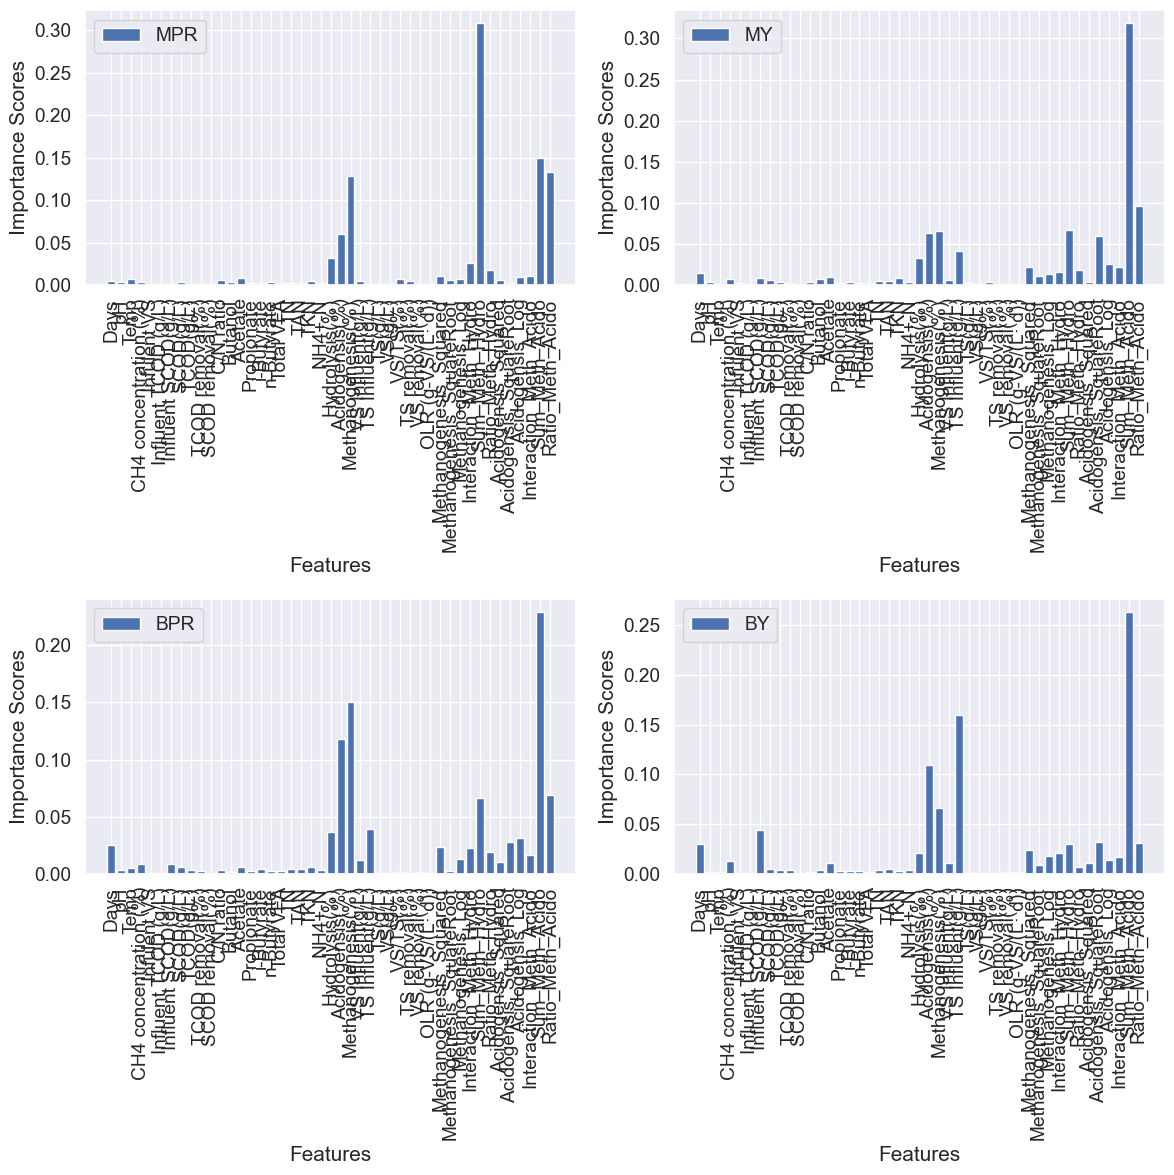

In [56]:
#隨機森林塞選變

# 準備特徵和目標變量
features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
            'Methanogenesis_Squared', 'Methanogenesis_SquareRoot', 'Methanogenesis_Log',
            'Interaction_Meth_Hydro', 'Sum_Meth_Hydro', 'Ratio_Meth_Hydro', 'Acidogensis_Squared',
            'Acidogensis_SquareRoot', 'Acidogensis_Log', 'Interaction_Meth_Acido', 'Sum_Meth_Acido',
            'Ratio_Meth_Acido']

targets = ['MPR', 'MY', 'BPR', 'BY']  # 目標變量

target_MPR = train['MPR']
target_MY = train['MY']
target_BPR = train['BPR']
target_BY = train['BY']

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, target in enumerate(targets):
    row = i // 2
    col = i % 2

    # 創建特徵和目標變量的數據集
    X = train[features]
    y = train[target]

    # 构建随機森林模型
    model = RandomForestRegressor(n_estimators=100)

    # 訓練模型
    model.fit(X, y)

    # 提取變量重要性
    importance_scores = model.feature_importances_

    # 可視化變量重要性
    axes[row, col].bar(features, importance_scores, label=target)
    axes[row, col].set_xlabel('Features')
    axes[row, col].set_ylabel('Importance Scores')
    axes[row, col].set_xticklabels(features, rotation=90)
    axes[row, col].legend()

plt.tight_layout()
plt.show()

In [57]:
#迭代特徵選擇
from sklearn.feature_selection import RFE

model = RandomForestRegressor(n_estimators=300)

rfe = RFE(estimator=model, n_features_to_select=10)  # 選擇保留的特徵數量

X_selected = rfe.fit_transform(X, y)

selected_feature_indexes = rfe.get_support(indices=True)
selected_features = [features[idx] for idx in selected_feature_indexes]



print("使用遞歸特徵消除 (RFE) 選擇特徵:")
print(selected_features)


使用遞歸特徵消除 (RFE) 選擇特徵:
['Days', 'Influent SCOD(g/L)', 'Acidogensis(%)', 'Methanogenesis(%)', 'TS Influent(g/L)', 'Interaction_Meth_Hydro', 'Sum_Meth_Hydro', 'Acidogensis_SquareRoot', 'Sum_Meth_Acido', 'Ratio_Meth_Acido']


In [58]:
# import seaborn as sns

# selected_features = ['Days', 'Influent SCOD(g/L)', 'Acidogensis(%)', 'Methanogenesis(%)',
#                      'TS Influent(g/L)', 'Methanogenesis_Squared', 'Interaction_Meth_Hydro',
#                      'Sum_Meth_Hydro', 'Acidogensis_SquareRoot', 'Interaction_Meth_Acido',
#                      'Sum_Meth_Acido', 'Ratio_Meth_Acido']
# targets = ['MPR', 'MY', 'BPR', 'BY']

# fig, axes = plt.subplots(2, 2, figsize=(12, 12))
# fig.suptitle('Correlation Heatmaps of Selected Features with Target Variables')

# vmin = 0.825  # Minimum value for the color scale
# vmax = 1.000  # Maximum value for the color scale

# for i, ax in enumerate(axes.flatten()):
#     target_variable = targets[i]
#     selected_data = train[selected_features + [target_variable]]
#     corr_matrix = selected_data.corr()

#     sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', ax=ax, vmin=vmin, vmax=vmax)
#     ax.set_title(f'Correlation with {target_variable}')

# plt.tight_layout()
# plt.show()


In [59]:
X_selected = pd.DataFrame(X_selected, columns=selected_features)
scaler = RobustScaler()
X_selected_scaled = scaler.fit_transform(X_selected)
model.fit(X_selected_scaled, y)

RandomForestRegressor(n_estimators=300)

Target: MPR


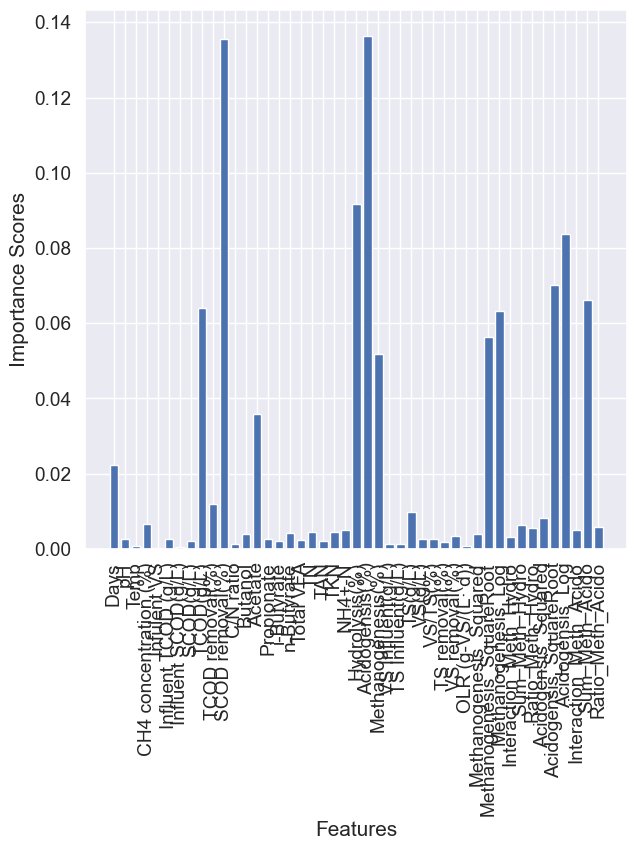

Target: MY


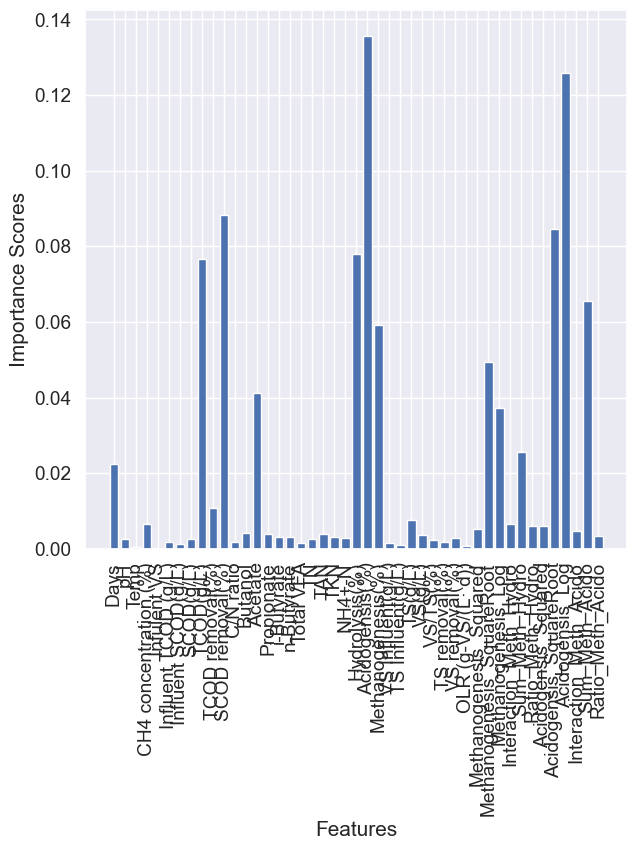

Target: BPR


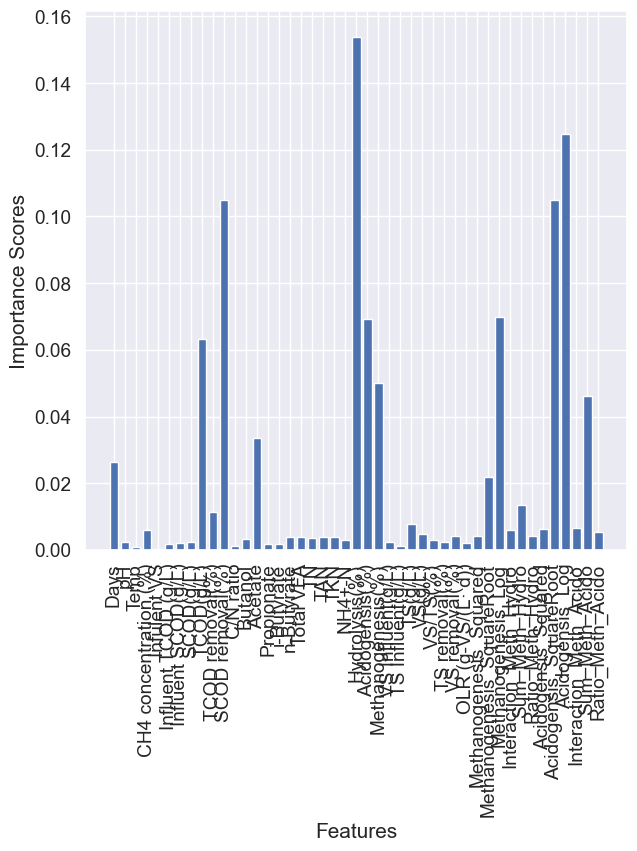

Target: BY


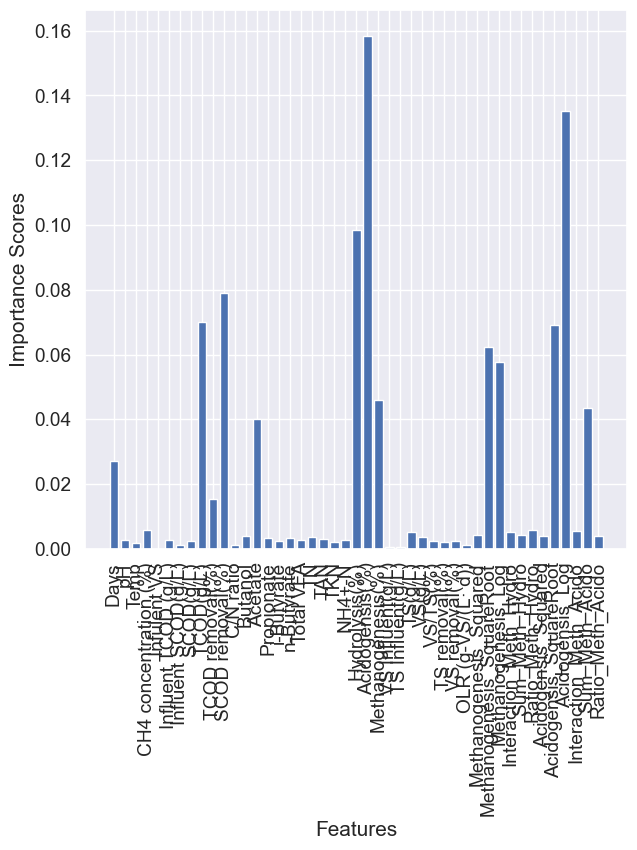

In [60]:
#隨機森林塞選變

# 準備特徵和目標變量
features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
            'Methanogenesis_Squared', 'Methanogenesis_SquareRoot', 'Methanogenesis_Log',
            'Interaction_Meth_Hydro', 'Sum_Meth_Hydro', 'Ratio_Meth_Hydro', 'Acidogensis_Squared',
            'Acidogensis_SquareRoot', 'Acidogensis_Log', 'Interaction_Meth_Acido', 'Sum_Meth_Acido',
            'Ratio_Meth_Acido']

targets = ['MPR', 'MY', 'BPR', 'BY']  # 目標變量


test_target_MPR = test['MPR']
test_target_MY = test['MY']
test_target_BPR = test['BPR']
test_target_BY = test['BY']

for target in targets:
    print("Target:", target)
    
    # 創建特徵和目標變量的數據集
    X_test = test[features]
    y_test = test[targets]
    
    # 建構隨機森林
    model = RandomForestRegressor(n_estimators=100)
    
    # 訓練模型
    model.fit(X_test, y_test)
    
    # 提取變量重要性
    importance_scores = model.feature_importances_
    
    # 可視化變量重要性
    plt.figure(figsize=(7, 7))
    plt.bar(features, importance_scores)
    plt.xlabel('Features')
    plt.ylabel('Importance Scores')
    plt.xticks(rotation=90)
    plt.show()


In [61]:
# #隨機森林塞選變數

# # 創建特徵和目標變量的數據集
# X_test = test[features]
# y_test = test[targets]
# test_target_MPR = test['MPR']
# test_target_MY = test['MY']
# test_target_BPR = test['BPR']
# test_target_BY = test['BY']
# # 構建隨機森林模型
# model = RandomForestRegressor(n_estimators=300)

# # 訓練模型
# model.fit(X_test, y_test)

# # 提取變數重要性
# importance_scores = model.feature_importances_

# # 可視化變數重要性


# plt.bar(features, importance_scores)
# plt.xlabel('Features')
# plt.ylabel('Importance Scores')
# plt.xticks(rotation=90)
# plt.show()


In [62]:
#導入
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split,cross_val_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin




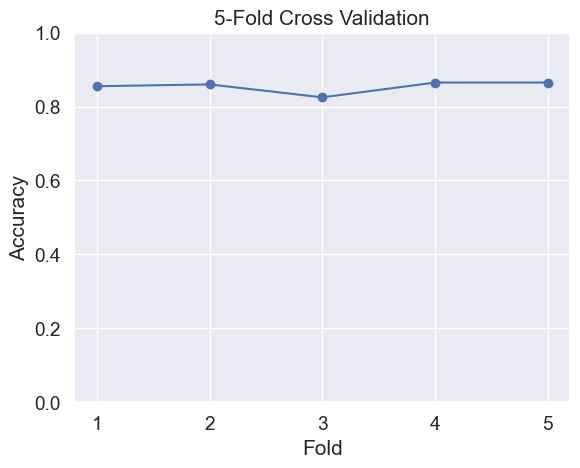

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# 生成一個虛擬的分類資料集
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# 建立一個決策樹分類器
classifier = DecisionTreeClassifier()

# 進行5折交叉驗證，取得每折的準確度
cv_scores = cross_val_score(classifier, X, y, cv=5)

# 設定圖表標題和軸標籤
plt.title("5-Fold Cross Validation")
plt.xlabel("Fold")
plt.ylabel("Accuracy")

# 繪製每折交叉驗證的準確度
plt.plot(np.arange(1, 6), cv_scores, marker='o', linestyle='-')
plt.xticks(np.arange(1, 6))
plt.ylim(0, 1)

# 顯示圖表
plt.show()


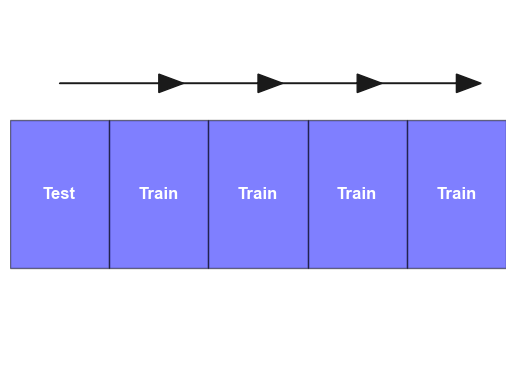

In [64]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()

# 创建五个部分
for i in range(5):
    ax.add_patch(patches.Rectangle((i*0.2, 0.3), 0.2, 0.4, edgecolor='black', facecolor='blue', alpha=0.5))

# 标记训练集和测试集
for i in range(5):
    plt.text(i*0.2+0.1, 0.5, 'Test' if i==0 else 'Train', color='white', weight='bold', 
             size=12, ha='center', va='center')

# 添加箭头表示交叉验证过程
for i in range(1, 5):
    plt.arrow(i*0.2-0.1, 0.8, 0.2, 0, head_width=0.05, head_length=0.05, fc='k', ec='k')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.show()


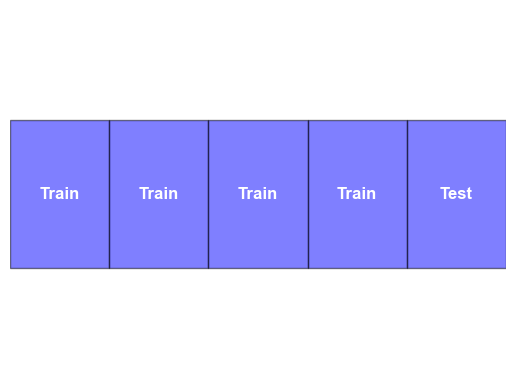

In [65]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation, PillowWriter
from sklearn.metrics import make_scorer

fig, ax = plt.subplots()

# 创建五个部分
rects = [patches.Rectangle((i*0.2, 0.3), 0.2, 0.4, edgecolor='black', facecolor='blue', alpha=0.5) for i in range(5)]
texts = [plt.text(i*0.2+0.1, 0.5, 'Train', color='white', weight='bold', size=12, ha='center', va='center') for i in range(5)]
arrows = [plt.arrow(i*0.2+0.1, 0.8, 0.2, 0, head_width=0.05, head_length=0.05, fc='k', ec='k') for i in range(4)]

for rect in rects:
    ax.add_patch(rect)

# 更新函数
def update(num):
    for i in range(5):
        texts[i].set_text('Test' if i==num else 'Train')
    for i in range(4):
        arrows[i].set_visible(i == num)

# 创建动画
ani = FuncAnimation(fig, update, frames=range(5), repeat=True)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

# 保存为GIF
ani.save('cross_validation.gif', writer=PillowWriter(fps=2))

plt.show()


In [104]:
# 交叉驗證
n_folds = 5

# RMSE
def rmsle_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return rmse

# MAE
def mae_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
    mae = -cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=kf)
    return mae

# R-squared
def r2_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
    r2 = cross_val_score(model, X, y, scoring="r2", cv=kf)
    return r2


# MAPE scorer
def mape(actual, pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape_scorer = make_scorer(mape, greater_is_better=False)

def mape_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
    mape = -cross_val_score(model, X, y, scoring=mape_scorer, cv=kf)
    return mape


In [105]:
# 用來儲存模型的字典
models_dict = {}

for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
    print("Target:", target_name)

    train_size = 0.8
    X = train[features].loc[target.index]
    y_selected = target

    # 使用train_test_split来拆分训练集和验证集
    X_train, X_valid, y_train, y_valid = train_test_split(X, y_selected, train_size=train_size, random_state=1)

    # Lasso
    lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
    lasso.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, lasso.predict(X_train))
    valid_mae = mean_absolute_error(y_valid, lasso.predict(X_valid))
    train_rmse = np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, lasso.predict(X_valid)))
    train_r2 = r2_score(y_train, lasso.predict(X_train))
    valid_r2 = r2_score(y_valid, lasso.predict(X_valid))
    train_mape = mape(y_train, lasso.predict(X_train))
    valid_mape = mape(y_valid, lasso.predict(X_valid))
    print("\nLasso Train MAE score: {:.4f}".format(train_mae))
    print("Lasso Valid MAE score: {:.4f}".format(valid_mae))
    print("Lasso Train RMSE score: {:.4f}".format(train_rmse))
    print("Lasso Valid RMSE score: {:.4f}".format(valid_rmse))
    print("Lasso Train R^2 score: {:.4f}".format(train_r2))
    print("Lasso Valid R^2 score: {:.4f}".format(valid_r2))
    print("Lasso Train MAPE score: {:.4f}".format(train_mape))
    print("Lasso Valid MAPE score: {:.4f}".format(valid_mape))
    models_dict[target_name + '_lasso'] = lasso

    # ENet
    ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
    ENet.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, ENet.predict(X_train))
    valid_mae = mean_absolute_error(y_valid, ENet.predict(X_valid))
    train_rmse = np.sqrt(mean_squared_error(y_train, ENet.predict(X_train)))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, ENet.predict(X_valid)))
    train_r2 = r2_score(y_train, ENet.predict(X_train))
    valid_r2 = r2_score(y_valid, ENet.predict(X_valid))
    train_mape = mape(y_train, ENet.predict(X_train))
    valid_mape = mape(y_valid, ENet.predict(X_valid))
    print("\nElasticNet Train MAE score: {:.4f}".format(train_mae))
    print("ElasticNet Valid MAE score: {:.4f}".format(valid_mae))
    print("ElasticNet Train RMSE score: {:.4f}".format(train_rmse))
    print("ElasticNet Valid RMSE score: {:.4f}".format(valid_rmse))
    print("ElasticNet Train R^2 score: {:.4f}".format(train_r2))
    print("ElasticNet Valid R^2 score: {:.4f}".format(valid_r2))
    print("ElasticNet Train MAPE score: {:.4f}".format(train_mape))
    print("ElasticNet Valid MAPE score: {:.4f}".format(valid_mape))
    models_dict[target_name + '_ENet'] = ENet

    # KRR
    KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
    KRR.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, KRR.predict(X_train))
    valid_mae = mean_absolute_error(y_valid, KRR.predict(X_valid))
    train_rmse = np.sqrt(mean_squared_error(y_train, KRR.predict(X_train)))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, KRR.predict(X_valid)))
    train_r2 = r2_score(y_train, KRR.predict(X_train))
    valid_r2 = r2_score(y_valid, KRR.predict(X_valid))
    train_mape = mape(y_train, KRR.predict(X_train))
    valid_mape = mape(y_valid, KRR.predict(X_valid))
    print("\nKernel Ridge Train MAE score: {:.4f}".format(train_mae))
    print("Kernel Ridge Valid MAE score: {:.4f}".format(valid_mae))
    print("Kernel Ridge Train RMSE score: {:.4f}".format(train_rmse))
    print("Kernel Ridge Valid RMSE score: {:.4f}".format(valid_rmse))
    print("Kernel Ridge Train R^2 score: {:.4f}".format(train_r2))
    print("Kernel Ridge Valid R^2 score: {:.4f}".format(valid_r2))
    print("Kernel Ridge Train MAPE score: {:.4f}".format(train_mape))
    print("Kernel Ridge Valid MAPE score: {:.4f}".format(valid_mape))
    models_dict[target_name + '_KRR'] = KRR

    # 梯度提升
    GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                       max_depth=4, max_features='sqrt',
                                       min_samples_leaf=15, min_samples_split=10,
                                       loss='huber', random_state=5)
    GBoost.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, GBoost.predict(X_train))
    valid_mae = mean_absolute_error(y_valid, GBoost.predict(X_valid))
    train_rmse = np.sqrt(mean_squared_error(y_train, GBoost.predict(X_train)))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, GBoost.predict(X_valid)))
    train_r2 = r2_score(y_train, GBoost.predict(X_train))
    valid_r2 = r2_score(y_valid, GBoost.predict(X_valid))
    train_mape = mape(y_train, GBoost.predict(X_train))
    valid_mape = mape(y_valid, GBoost.predict(X_valid))
    print("\nGradient Boosting Train MAE score: {:.4f}".format(train_mae))
    print("Gradient Boosting Valid MAE score: {:.4f}".format(valid_mae))
    print("Gradient Boosting Train RMSE score: {:.4f}".format(train_rmse))
    print("Gradient Boosting Valid RMSE score: {:.4f}".format(valid_rmse))
    print("Gradient Boosting Train R^2 score: {:.4f}".format(train_r2))
    print("Gradient Boosting Valid R^2 score: {:.4f}".format(valid_r2))
    print("Gradient Boosting Train MAPE score: {:.4f}".format(train_mape))
    print("Gradient Boosting Valid MAPE score: {:.4f}".format(valid_mape))
    models_dict[target_name + '_GBoost'] = GBoost

    # XGB
    model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.4608,
                                 learning_rate=0.05, max_depth=3,
                                 min_child_weight=1.7817, n_estimators=2200,
                                 subsample=0.5213,
                                 reg_alpha=0.4640, reg_lambda=0.8571,
                                 random_state=7, nthread=-1)
    # XGBoost
    model_xgb.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, model_xgb.predict(X_train))
    valid_mae = mean_absolute_error(y_valid, model_xgb.predict(X_valid))
    train_rmse = np.sqrt(mean_squared_error(y_train, model_xgb.predict(X_train)))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, model_xgb.predict(X_valid)))
    train_r2 = r2_score(y_train, model_xgb.predict(X_train))
    valid_r2 = r2_score(y_valid, model_xgb.predict(X_valid))
    train_mape = mape(y_train, model_xgb.predict(X_train))
    valid_mape = mape(y_valid, model_xgb.predict(X_valid))
    print("\nXgboost Train MAE score: {:.4f}".format(train_mae))
    print("Xgboost Valid MAE score: {:.4f}".format(valid_mae))
    print("Xgboost Train RMSE score: {:.4f}".format(train_rmse))
    print("Xgboost Valid RMSE score: {:.4f}".format(valid_rmse))
    print("Xgboost Train R^2 score: {:.4f}".format(train_r2))
    print("Xgboost Valid R^2 score: {:.4f}".format(valid_r2))
    print("Xgboost Train MAPE score: {:.4f}".format(train_mape))
    print("Xgboost Valid MAPE score: {:.4f}".format(valid_mape))
    models_dict[target_name + '_xgb'] = model_xgb

    # lgb
    model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=28,
                                  learning_rate=0.020000000000000004, n_estimators=700,
                                  max_bin=40, subsample=0.7777777777777778, subsample_freq=3,
                                  colsample_bytree=0.7777777777777778,
                                  min_child_samples=5, min_child_weight=11)

    model_lgb.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, model_lgb.predict(X_train))
    valid_mae = mean_absolute_error(y_valid, model_lgb.predict(X_valid))
    train_rmse = np.sqrt(mean_squared_error(y_train, model_lgb.predict(X_train)))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, model_lgb.predict(X_valid)))
    train_r2 = r2_score(y_train, model_lgb.predict(X_train))
    valid_r2 = r2_score(y_valid, model_lgb.predict(X_valid))
    train_mape = mape(y_train, model_lgb.predict(X_train))
    valid_mape = mape(y_valid, model_lgb.predict(X_valid))  
    print("\nLGB Train MAE score: {:.4f}".format(train_mae))
    print("LGB Valid MAE score: {:.4f}".format(valid_mae))  
    print("LGB Train RMSE score: {:.4f}".format(train_rmse))
    print("LGB Valid RMSE score: {:.4f}".format(valid_rmse))
    print("LGB Train R^2 score: {:.4f}".format(train_r2))
    print("LGB Valid R^2 score: {:.4f}".format(valid_r2))
    print("LGB Train MAPE score: {:.4f}".format(train_mape))
    print("LGB Valid MAPE score: {:.4f}".format(valid_mape))
    models_dict[target_name + '_lgb'] = model_lgb


Target: MPR

Lasso Train MAE score: 0.1941
Lasso Valid MAE score: 0.2440
Lasso Train RMSE score: 0.3055
Lasso Valid RMSE score: 0.3801
Lasso Train R^2 score: 0.9137
Lasso Valid R^2 score: 0.7661
Lasso Train MAPE score: 71.3777
Lasso Valid MAPE score: 230.2022

ElasticNet Train MAE score: 0.1942
ElasticNet Valid MAE score: 0.2442
ElasticNet Train RMSE score: 0.3054
ElasticNet Valid RMSE score: 0.3813
ElasticNet Train R^2 score: 0.9138
ElasticNet Valid R^2 score: 0.7646
ElasticNet Train MAPE score: 71.5662
ElasticNet Valid MAPE score: 231.4356

Kernel Ridge Train MAE score: 0.1513
Kernel Ridge Valid MAE score: 0.2376
Kernel Ridge Train RMSE score: 0.2492
Kernel Ridge Valid RMSE score: 0.4130
Kernel Ridge Train R^2 score: 0.9426
Kernel Ridge Valid R^2 score: 0.7238
Kernel Ridge Train MAPE score: 51.8855
Kernel Ridge Valid MAPE score: 173.8918

Gradient Boosting Train MAE score: 0.0318
Gradient Boosting Valid MAE score: 0.2610
Gradient Boosting Train RMSE score: 0.1561
Gradient Boosting Va

In [103]:
# 將測試數據的特徵篩選至和訓練數據一樣的特徵
X_test_selected = X_test[selected_features]

In [69]:
# 用来储存模型的字典
models_dict_test = {}

for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [test_target_MPR, test_target_MY, test_target_BPR, test_target_BY]):
    print("Target:", target_name)
    
    train_size = 0.8
    X = test[selected_features].loc[target.index]
    y_selected = target

    # 使用train_test_split来拆分训练集和验证集
    X_train, X_test, y_train, y_test = train_test_split(X, y_selected, train_size=train_size, random_state=1)

    # Lasso
    lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
    lasso.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, lasso.predict(X_train))
    test_mae = mean_absolute_error(y_test, lasso.predict(X_test))
    train_rmse = np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
    train_r2 = r2_score(y_train, lasso.predict(X_train))
    test_r2 = r2_score(y_test, lasso.predict(X_test))
    train_mape = mape(y_train, lasso.predict(X_train))
    test_mape = mape(y_test, lasso.predict(X_test))
    print("\nLasso Train MAE score: {:.4f}".format(train_mae))
    print("Lasso Test MAE score: {:.4f}".format(test_mae))
    print("Lasso Train RMSE score: {:.4f}".format(train_rmse))
    print("Lasso Test RMSE score: {:.4f}".format(test_rmse))
    print("Lasso Train R^2 score: {:.4f}".format(train_r2))
    print("Lasso Test R^2 score: {:.4f}".format(test_r2))
    print("Lasso Train MAPE score: {:.4f}".format(train_mape))
    print("Lasso Test MAPE score: {:.4f}".format(test_mape))
    models_dict[target_name + '_lasso'] = lasso
    
    # ENet
    ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
    ENet.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, ENet.predict(X_train))
    test_mae = mean_absolute_error(y_test, ENet.predict(X_test))
    train_rmse = np.sqrt(mean_squared_error(y_train, ENet.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, ENet.predict(X_test)))
    train_r2 = r2_score(y_train, ENet.predict(X_train))
    test_r2 = r2_score(y_test, ENet.predict(X_test))
    train_mape = mape(y_train, ENet.predict(X_train))
    test_mape = mape(y_test, ENet.predict(X_test))
    print("\nElasticNet Train MAE score: {:.4f}".format(train_mae))
    print("ElasticNet Test MAE score: {:.4f}".format(test_mae))
    print("ElasticNet Train RMSE score: {:.4f}".format(train_rmse))
    print("ElasticNet Test RMSE score: {:.4f}".format(test_rmse))
    print("ElasticNet Train R^2 score: {:.4f}".format(train_r2))
    print("ElasticNet Test R^2 score: {:.4f}".format(test_r2))
    print("ElasticNet Train MAPE score: {:.4f}".format(train_mape))
    print("ElasticNet Test MAPE score: {:.4f}".format(test_mape))
    models_dict[target_name + '_ENet'] = ENet
    
    # KRR
    KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
    KRR.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, KRR.predict(X_train))
    test_mae = mean_absolute_error(y_test, KRR.predict(X_test))
    train_rmse = np.sqrt(mean_squared_error(y_train, KRR.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, KRR.predict(X_test)))
    train_r2 = r2_score(y_train, KRR.predict(X_train))
    test_r2 = r2_score(y_test, KRR.predict(X_test))
    train_mape = mape(y_train, KRR.predict(X_train))
    test_mape = mape(y_test, KRR.predict(X_test))
    print("\nKernel Ridge Train MAE score: {:.4f}".format(train_mae))
    print("Kernel Ridge Test MAE score: {:.4f}".format(test_mae))
    print("Kernel Ridge Train RMSE score: {:.4f}".format(train_rmse))
    print("Kernel Ridge Test RMSE score: {:.4f}".format(test_rmse))
    print("Kernel Ridge Train R^2 score: {:.4f}".format(train_r2))
    print("Kernel Ridge Test R^2 score: {:.4f}".format(test_r2))
    print("Kernel Ridge Train MAPE score: {:.4f}".format(train_mape))
    print("Kernel Ridge Test MAPE score: {:.4f}".format(test_mape))
    models_dict[target_name + '_KRR'] = KRR
    
    # 梯度提升
    GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                       max_depth=4, max_features='sqrt',
                                       min_samples_leaf=15, min_samples_split=10,
                                       loss='huber', random_state=5)
    GBoost.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, GBoost.predict(X_train))
    test_mae = mean_absolute_error(y_test, GBoost.predict(X_test))
    train_rmse = np.sqrt(mean_squared_error(y_train, GBoost.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, GBoost.predict(X_test)))
    train_r2 = r2_score(y_train, GBoost.predict(X_train))
    test_r2 = r2_score(y_test, GBoost.predict(X_test))
    train_mape = mape(y_train, GBoost.predict(X_train))
    test_mape = mape(y_test, GBoost.predict(X_test))
    print("\nGradient Boosting Train MAE score: {:.4f}".format(train_mae))
    print("Gradient Boosting Test MAE score: {:.4f}".format(test_mae))
    print("Gradient Boosting Train RMSE score: {:.4f}".format(train_rmse))
    print("Gradient Boosting Test RMSE score: {:.4f}".format(test_rmse))
    print("Gradient Boosting Train R^2 score: {:.4f}".format(train_r2))
    print("Gradient Boosting Test R^2 score: {:.4f}".format(test_r2))
    print("Gradient Boosting Train MAPE score: {:.4f}".format(train_mape))
    print("Gradient Boosting Test MAPE score: {:.4f}".format(test_mape))
    models_dict[target_name + '_GBoost'] = GBoost
    
    # XGB
    model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.4608,
                                 learning_rate=0.05, max_depth=3,
                                 min_child_weight=1.7817, n_estimators=2200,
                                 subsample=0.5213,
                                 reg_alpha=0.4640, reg_lambda=0.8571,
                                 random_state=7, nthread=-1)
    model_xgb.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, model_xgb.predict(X_train))
    test_mae = mean_absolute_error(y_test, model_xgb.predict(X_test))
    train_rmse = np.sqrt(mean_squared_error(y_train, model_xgb.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model_xgb.predict(X_test)))
    train_r2 = r2_score(y_train, model_xgb.predict(X_train))
    test_r2 = r2_score(y_test, model_xgb.predict(X_test))
    train_mape = mape(y_train, model_xgb.predict(X_train))
    test_mape = mape(y_test, model_xgb.predict(X_test))
    print("\nXgboost Train MAE score: {:.4f}".format(train_mae))
    print("Xgboost Test MAE score: {:.4f}".format(test_mae))
    print("Xgboost Train RMSE score: {:.4f}".format(train_rmse))
    print("Xgboost Test RMSE score: {:.4f}".format(test_rmse))
    print("Xgboost Train R^2 score: {:.4f}".format(train_r2))
    print("Xgboost Test R^2 score: {:.4f}".format(test_r2))
    print("Xgboost Train MAPE score: {:.4f}".format(train_mape))
    print("Xgboost Test MAPE score: {:.4f}".format(test_mape))
    models_dict[target_name + '_xgb'] = model_xgb

    # lgb
    model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=28,
                                  learning_rate=0.02, n_estimators=700,
                                  max_bin=40, subsample=0.7777777777777778, subsample_freq=3,
                                  colsample_bytree=0.7777777777777778,
                                  min_child_samples=5, min_child_weight=11)

    model_lgb.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, model_lgb.predict(X_train))
    test_mae = mean_absolute_error(y_test, model_lgb.predict(X_test))
    train_rmse = np.sqrt(mean_squared_error(y_train, model_lgb.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model_lgb.predict(X_test)))
    train_r2 = r2_score(y_train, model_lgb.predict(X_train))
    test_r2 = r2_score(y_test, model_lgb.predict(X_test))
    train_mape = mape(y_train, model_lgb.predict(X_train))
    test_mape = mape(y_test, model_lgb.predict(X_test))
    print("\nLGB Train MAE score: {:.4f}".format(train_mae))
    print("LGB Test MAE score: {:.4f}".format(test_mae))
    print("LGB Train RMSE score: {:.4f}".format(train_rmse))
    print("LGB Test RMSE score: {:.4f}".format(test_rmse))
    print("LGB Train R^2 score: {:.4f}".format(train_r2))
    print("LGB Test R^2 score: {:.4f}".format(test_r2))
    print("LGB Train MAPE score: {:.4f}".format(train_mape))
    print("LGB Test MAPE score: {:.4f}".format(test_mape))
    models_dict_test[target_name + '_lgb'] = model_lgb


Target: MPR

Lasso Train MAE score: 0.2782
Lasso Test MAE score: 0.3184
Lasso Train RMSE score: 0.4161
Lasso Test RMSE score: 0.4227
Lasso Train R^2 score: 0.8335
Lasso Test R^2 score: 0.7584
Lasso Train MAPE score: 48.5681
Lasso Test MAPE score: 238.3856

ElasticNet Train MAE score: 0.2783
ElasticNet Test MAE score: 0.3184
ElasticNet Train RMSE score: 0.4161
ElasticNet Test RMSE score: 0.4229
ElasticNet Train R^2 score: 0.8335
ElasticNet Test R^2 score: 0.7581
ElasticNet Train MAPE score: 48.6169
ElasticNet Test MAPE score: 238.0479

Kernel Ridge Train MAE score: 0.2508
Kernel Ridge Test MAE score: 0.2835
Kernel Ridge Train RMSE score: 0.3749
Kernel Ridge Test RMSE score: 0.3776
Kernel Ridge Train R^2 score: 0.8648
Kernel Ridge Test R^2 score: 0.8071
Kernel Ridge Train MAPE score: 44.1756
Kernel Ridge Test MAPE score: 142.0703

Gradient Boosting Train MAE score: 0.0300
Gradient Boosting Test MAE score: 0.1498
Gradient Boosting Train RMSE score: 0.0629
Gradient Boosting Test RMSE score

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # 定义 clones 模型来适应数据
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # 做出预测并平均它们
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

averaged_models = AveragingModels(models=(model_lgb, GBoost, model_xgb, lasso))

models_dict_Ave = {}
cv = 5  # 假设进行5折交叉验证

for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [test_target_MPR, test_target_MY, test_target_BPR, test_target_BY]):
    print("Target:", target_name)
    
    train_size = 0.8
    X = test[selected_features].loc[target.index]
    y_selected = target

    # 使用 train_test_split 将数据分为训练集和验证集
    X_train, X_valid, y_train, y_valid = train_test_split(X, y_selected, train_size=train_size, random_state=1)

    # 在训练集上进行拟合和预测
    averaged_models.fit(X_train, y_train)
    y_train_pred = averaged_models.predict(X_train)
    y_valid_pred = averaged_models.predict(X_valid)

    # 计算训练集和验证集上的 MAE
    train_mae = mean_absolute_error(y_train, y_train_pred)
    valid_mae = mean_absolute_error(y_valid, y_valid_pred)

    # 计算训练集和验证集上的 RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

    # 计算训练集和验证集上的 R^2
    train_r2 = r2_score(y_train, y_train_pred)
    valid_r2 = r2_score(y_valid, y_valid_pred)

    # 计算训练集上的 MAPE
    train_mape = mape(y_train, y_train_pred)

    # 计算验证集上的 MAPE
    valid_mape = mape(y_valid, y_valid_pred)

    print("averaged_models Train MAE score: {:.4f}".format(train_mae))
    print("averaged_models Valid MAE score: {:.4f}".format(valid_mae))
    print("averaged_models Train RMSE score: {:.4f}".format(train_rmse))
    print("averaged_models Valid RMSE score: {:.4f}".format(valid_rmse))
    print("averaged_models Train R^2 score: {:.4f}".format(train_r2))
    print("averaged_models Valid R^2 score: {:.4f}".format(valid_r2))
    print("averaged_models Train MAPE score: {:.4f}".format(train_mape))
    print("averaged_models Valid MAPE score: {:.4f}".format(valid_mape))

    models_dict_Ave[target_name + '_averaged'] = averaged_models


Target: MPR
averaged_models Train MAE score: 0.1256
averaged_models Valid MAE score: 0.1909
averaged_models Train RMSE score: 0.1768
averaged_models Valid RMSE score: 0.2684
averaged_models Train R^2 score: 0.9699
averaged_models Valid R^2 score: 0.9026
averaged_models Train MAPE score: 21.0537
averaged_models Valid MAPE score: 71.2747
Target: MY
averaged_models Train MAE score: 0.1387
averaged_models Valid MAE score: 0.1903
averaged_models Train RMSE score: 0.1821
averaged_models Valid RMSE score: 0.2663
averaged_models Train R^2 score: 0.9682
averaged_models Valid R^2 score: 0.8979
averaged_models Train MAPE score: 40.5271
averaged_models Valid MAPE score: 150.6156
Target: BPR
averaged_models Train MAE score: 0.1371
averaged_models Valid MAE score: 0.1859
averaged_models Train RMSE score: 0.1870
averaged_models Valid RMSE score: 0.2539
averaged_models Train R^2 score: 0.9665
averaged_models Valid R^2 score: 0.9107
averaged_models Train MAPE score: 43.2993
averaged_models Valid MAPE s

In [71]:

# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
    
#     train_size = 0.8
#     X = train[features].loc[target.index]
#     y_selected = target

#     # 使用train_test_split來拆分訓練集和驗證集
#     X_train, X_valid, y_train, y_valid = train_test_split(X, y_selected, train_size=train_size, random_state=1)
    
#     #lgb
#     model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=28,
#                                 learning_rate=0.020000000000000004, n_estimators=700,
#                                 max_bin=40, subsample=0.7777777777777778, subsample_freq=3,
#                                 colsample_bytree= 0.7777777777777778,
#                                 min_child_samples=5, min_child_weight=11)

#     model_lgb.fit(X_train, y_train)
#     mae = mae_cv(model_lgb, X_train, y_train)
#     rmse = score = rmsle_cv(model_lgb, X_train, y_train)
#     r2 = r2_cv(model_lgb, X_train, y_train)
#     print("\nLGB MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nLGB RMSE score: {:.4f} ({:.4f})\n" .format(rmse.mean(), rmse.std()))
#     print("\nLGB R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_lgb'] = model_lgb

In [72]:
# from sklearn.model_selection import GridSearchCV

# # 對 LightGBM 進行參數優化
# lgb_params = {
#     'num_leaves': list(range(4, 32, 4)),  # 4 to 50 with a step of 4
#     'learning_rate': list(np.logspace(np.log10(0.01), np.log10(0.5), base = 10, num = 50)),  # 50 logarithmically spaced values between 0.01 and 0.5
#     'n_estimators': list(range(100, 600, 50)),  # from 100 to 800 with a step of 50
#     'max_bin': list(range(20, 60, 5)),  # from 20 to 60 with a step of 5
#     'subsample': list(np.linspace(0.1, 1, 10)),  # 10 values between 0.1 and 1
#     'subsample_freq': list(range(1, 6, 1)),  # from 1 to 6 with a step of 1
#     'colsample_bytree': list(np.linspace(0.1, 1, 10)),  # 10 values between 0.1 and 1
#     'min_child_samples': list(range(5, 50, 5)),  # from 5 to 50 with a step of 5
# }

# lgb_optimized = GridSearchCV(model_lgb, lgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# lgb_optimized.fit(X_train, y_train)
# print("Best parameters for LGB: ", lgb_optimized.best_params_)

In [73]:
# from sklearn.model_selection import RandomizedSearchCV

# # 對 LightGBM 進行參數優化
# lgb_params = {
#     'num_leaves': list(range(4, 50, 4)),  #  30 to 60 with a step of 2
#     'learning_rate': list(np.logspace(np.log10(0.001), np.log10(0.02), base = 10, num = 100)),  # 100 logarithmically spaced values between 0.01 and 0.2
#     'n_estimators': list(range(100, 800, 50)),  #  from 400 to 1000 with a step of 50
#     'max_bin': list(range(20, 60, 5)),  
#     'subsample': list(np.linspace(0.5, 1, 10)),  # 10 values between 0.5 and 1
#     'subsample_freq': list(range(1, 6, 1)),  
#     'colsample_bytree': list(np.linspace(0.5, 1, 10)),  # 10 values between 0.5 and 1
#     'min_child_samples': list(range(5, 50, 5)),  
# }


# lgb_optimized = RandomizedSearchCV(model_lgb, lgb_params, cv=5, n_iter=5000, scoring='neg_mean_squared_error', n_jobs=-1, random_state=500)
# lgb_optimized.fit(X_train, y_train)
# print("Best parameters for LGB: ", lgb_optimized.best_params_)

# # 對 XGBoost 進行參數優化
# xgb_params = {
#     'colsample_bytree': list(np.linspace(0.1, 1, 500)),  # 0.1 到 1 的 500 個值
#     'gamma': list(np.linspace(0, 1, 500)),  # 0 到 1 的 500 個值
#     'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 500)),  # log 均勻分佈的 500 個值
#     'max_depth': list(range(1, 11)),  # 1 到 10
#     'min_child_weight': list(range(1, 11)),  # 1 到 10
#     'n_estimators': list(range(50, 2500, 100)),  # 50 到 2500 步長為 100
#     'subsample': list(np.linspace(0.1, 1, 500)),  # 0.1 到 1 的 500 個值
#     'reg_alpha': list(np.linspace(0, 1, 500)),  # 0 到 1 的 500 個值
#     'reg_lambda': list(np.linspace(0, 1, 500)),  # 0 到 1 的 500 個值
# }

# xgb_optimized = RandomizedSearchCV(model_xgb, xgb_params, cv=5, n_iter=100, scoring='neg_mean_squared_error', n_jobs=-1)
# xgb_optimized.fit(X_train, y_train)
# print("Best parameters for XGB: ", xgb_optimized.best_params_)


In [74]:
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     X = train[features].loc[target.index]
#     y_selected = target
        
#     # Lasso
#     lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
#     lasso.fit(X, y_selected)
#     y_pred = lasso.predict(X)
#     mae = mae_cv(lasso, X, y_selected)
    
#     rmse = rmsle_cv(lasso, X, y_selected)
    
#     r2 = r2_cv(lasso, X, y_selected)
#     print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
    
#     print("\nLasso RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
    
#     print("\nLasso R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_lasso'] = lasso

In [75]:
# #Lasso
# lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005,random_state=1))

# #Lasso MAE得分
# score_mae = mae_cv(lasso, X_selected_scaled, y_selected)
# print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #Lasso RMSE得分
# score = rmsle_cv(lasso, X_selected_scaled, y_selected)
# print("\nLsso RMSE score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [76]:
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     X = train[features].loc[target.index]
#     y_selected = target
    
#     #ENet
#     ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
#     ENet.fit(X, y_selected)
#     mae = mae_cv(ENet, X, y_selected)
#     rmse = rmsle_cv(ENet, X, y_selected)
#     r2 = r2_cv(ENet, X, y_selected)
#     print("\nElasticNet MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nElasticNet RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
#     print("\nElasticNet R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_ENet'] = ENet

In [77]:
# #ENet
# ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

# #ENet MAE得分
# score_mae = mae_cv(ENet, X_selected_scaled, y_selected)
# print("\nElasticNet MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #ENet RMSE得分
# score = rmsle_cv(ENet, X_selected_scaled, y_selected)
# print("\nElasticNet RMSE score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [78]:
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     X = train[features].loc[target.index]
#     y_selected = target
    
#     #KRR
#     KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree= 2,coef0=2.5)
#     KRR.fit(X, y_selected)
#     mae = mae_cv(KRR, X, y_selected)
#     rmse = rmsle_cv(KRR, X, y_selected)
#     r2 = r2_cv(KRR, X, y_selected)
#     print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
#     print("\nKernel Ridge R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_KRR'] = KRR

In [79]:
# #KRR
# KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree= 2,coef0=2.5)

# #KRR MAE得分
# score_mae = mae_cv(KRR, X_selected_scaled, y_selected)
# print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #KRR RMSE得分
# score = rmsle_cv(KRR, X_selected_scaled, y_selected)
# print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [80]:
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     #梯度提升
#     GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,    # 樹的數量（n_estimators）    # 學習率（learning_rate）
#                                     max_depth=4, max_features='sqrt',            # 樹的最大深度（max_depth）    # 特徵的最大數量（max_features）
#                                     min_samples_leaf=15, min_samples_split=10,  # 每個葉子節點最小樣本數（min_samples_leaf）    # 節點分裂所需最小樣本數（min_samples_split）
#                                     loss='huber', random_state=5)               # 損失函數（loss）
#     #GBoost 得分
#     GBoost.fit(X, y_selected)
#     mae = mae_cv(GBoost, X, y_selected)
#     rmse = rmsle_cv(GBoost, X, y_selected)
#     r2 = r2_cv(GBoost, X, y_selected)
#     print("\nGradient Boosting MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nGradient Boosting RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
#     print("\nGradient Boosting R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_GBoost'] = GBoost

In [81]:
# #梯度提升
# GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10,
#                                    loss='huber', random_state=5)
# # 樹的數量（n_estimators）
# # 學習率（learning_rate）
# # 樹的最大深度（max_depth）
# # 特徵的最大數量（max_features）
# # 每個葉子節點最小樣本數（min_samples_leaf）
# # 節點分裂所需最小樣本數（min_samples_split）
# # 損失函數（loss）

# #GBoost MAE得分
# score_mae = mae_cv(GBoost, X_selected_scaled, y_selected)
# print("\nGradient Boosting MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #GBoost RMSE得分
# score = rmsle_cv(GBoost, X_selected_scaled, y_selected)
# print("\nGradient Boosting RMSE score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [82]:
# warnings.filterwarnings("ignore", message="Parameters: { \"silent\" } are not used.")
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     #XGB
#     model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.4608,     # colsamples_bytree 是列的採樣率    # gamma 是節點劃分所需的最小損失減少值
#                              learning_rate=0.05, max_depth=3,               # learning_rate 是每次迭代的步長大小 # max_depth 是樹的最大深度
#                              min_child_weight=1.7817,n_estimators=2200,     # min_child_weight 是子節點所需最小樣本數   # n_estimators 是樹的數量
#                              subsample=0.5213,                              # subsample 是行的採樣率            
#                              reg_alpha=0.4640, reg_lambda=0.8571,           # reg_alpha 和 reg_lambda 是 L1 和 L2 正則化項的權重
#                              random_state=7, nthread=-1)                    # nthread 是 CPU 的使用數量
#     #XGBoost
#     model_xgb.fit(X, y_selected)
#     mae = mae_cv(model_xgb, X, y_selected)
#     rmse = rmsle_cv(model_xgb, X, y_selected)
#     r2 = r2_cv(model_xgb, X, y_selected)
#     print("\nXgboost MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nXgboost RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
#     print("\nXgboost R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_xgb'] = model_xgb

In [83]:
# warnings.filterwarnings("ignore", category=UserWarning)
# #XGB
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.4608,
#                              learning_rate=0.05, max_depth=3,
#                              min_child_weight=1.7817,n_estimators=2200,
#                              subsample=0.5213,silent=1,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              random_state=7, nthread=-1)
# # colsamples_bytree 是列的採樣率
# # gamma 是節點劃分所需的最小損失減少值
# # learning_rate 是每次迭代的步長大小
# # max_depth 是樹的最大深度
# # min_child_weight 是子節點所需最小樣本數
# # n_estimators 是樹的數量
# # subsample 是行的採樣率
# # reg_alpha 和 reg_lambda 是 L1 和 L2 正則化項的權重
# # random_state 是隨機種子
# # nthread 是 CPU 的使用數量

# #XGBoost MAE得分
# score_mae = mae_cv(model_xgb, X_selected_scaled, y_selected)
# print("\nXgboost MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #XGB RMSE得分
# score = rmsle_cv(model_xgb, X_selected_scaled, y_selected)
# print("\nXgboost RMSE score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [84]:
# warnings.filterwarnings("ignore", message="Parameters: { \"silent\" } are not used.")
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
    
#     #lgb
#     model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
#                                 learning_rate=0.05, n_estimators=720,
#                                 max_bin=55, subsample=0.8, subsample_freq=5,
#                                 colsample_bytree=0.2319,
#                                 min_child_samples=6, min_child_weight=11)

#     model_lgb.fit(X, y_selected)
#     mae = mae_cv(model_lgb, X, y_selected)
#     rmse = score = rmsle_cv(model_lgb, X, y_selected)
#     r2 = r2_cv(model_lgb, X, y_selected)
#     print("\nLGB MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nLGB RMSE score: {:.4f} ({:.4f})\n" .format(rmse.mean(), rmse.std()))
#     print("\nLGB R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_lgb'] = model_lgb

In [85]:
# #lgb
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

# #LightGB MAE得分
# score_mae = mae_cv(model_lgb, X_selected_scaled, y_selected)
# print("\nLGB MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #LightGB RMSE得分
# score = rmsle_cv(model_lgb, X_selected_scaled, y_selected)
# print("\nLGB RMSE score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

In [106]:
# 對於test進行相同的特徵選擇
X_test_selected = test[features]

# 對每個目標變量進行預測
for target_name in ['MPR', 'MY', 'BPR', 'BY']:
    y_test = test[target_name]
    
    print("Target:", target_name)
    
    # Lasso
    y_pred_lasso = models_dict[target_name + '_lasso'].predict(X_test_selected)
    mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
    rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    r2_lasso = r2_score(y_test, y_pred_lasso)
    mape_lasso = np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100
    std_lasso = np.std(y_pred_lasso)
    print("Lasso R^2: {:.4f} ({:.4f})".format(r2_lasso, std_lasso))
    print("Lasso MAE: {:.4f} ({:.4f})".format(mae_lasso, std_lasso))
    print("Lasso RMSE: {:.4f} ({:.4f})".format(rmse_lasso, std_lasso))
    print("Lasso MAPE: {:.4f}".format(mape_lasso))
    
    # ENet
    y_pred_ENet = models_dict[target_name + '_ENet'].predict(X_test_selected)
    mae_ENet = mean_absolute_error(y_test, y_pred_ENet)
    rmse_ENet = np.sqrt(mean_squared_error(y_test, y_pred_ENet))
    r2_ENet = r2_score(y_test, y_pred_ENet)
    mape_ENet = np.mean(np.abs((y_test - y_pred_ENet) / y_test)) * 100
    std_ENet = np.std(y_pred_ENet)
    print("ElasticNet R^2: {:.4f} ({:.4f})".format(r2_ENet, std_ENet))
    print("ElasticNet MAE: {:.4f} ({:.4f})".format(mae_ENet, std_ENet))
    print("ElasticNet RMSE: {:.4f} ({:.4f})".format(rmse_ENet, std_ENet))
    print("ElasticNet MAPE: {:.4f}".format(mape_ENet))
    
    # KRR
    y_pred_KRR = models_dict[target_name + '_KRR'].predict(X_test_selected)
    mae_KRR = mean_absolute_error(y_test, y_pred_KRR)
    rmse_KRR = np.sqrt(mean_squared_error(y_test, y_pred_KRR))
    r2_KRR = r2_score(y_test, y_pred_KRR)
    mape_KRR = np.mean(np.abs((y_test - y_pred_KRR) / y_test)) * 100
    std_KRR = np.std(y_pred_KRR)
    print("Kernel Ridge R^2: {:.4f} ({:.4f})".format(r2_KRR, std_KRR))
    print("Kernel Ridge MAE: {:.4f} ({:.4f})".format(mae_KRR, std_KRR))
    print("Kernel Ridge RMSE: {:.4f} ({:.4f})".format(rmse_KRR, std_KRR))
    print("Kernel Ridge MAPE: {:.4f}".format(mape_KRR))
    
    # GBoost
    y_pred_GBoost = models_dict[target_name + '_GBoost'].predict(X_test_selected)
    mae_GBoost = mean_absolute_error(y_test, y_pred_GBoost)
    rmse_GBoost = np.sqrt(mean_squared_error(y_test, y_pred_GBoost))
    r2_GBoost = r2_score(y_test, y_pred_GBoost)
    mape_GBoost = np.mean(np.abs((y_test - y_pred_GBoost) / y_test)) * 100
    std_GBoost = np.std(y_pred_GBoost)
    print("Gradient Boosting R^2: {:.4f} ({:.4f})".format(r2_GBoost, std_GBoost))
    print("Gradient Boosting MAE: {:.4f} ({:.4f})".format(mae_GBoost, std_GBoost))
    print("Gradient Boosting RMSE: {:.4f} ({:.4f})".format(rmse_GBoost, std_GBoost))
    print("Gradient Boosting MAPE: {:.4f}".format(mape_GBoost))
    
    # XGB
    y_pred_xgb = models_dict[target_name + '_xgb'].predict(X_test_selected)
    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
    rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    r2_xgb = r2_score(y_test, y_pred_xgb)
    mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100
    std_xgb = np.std(y_pred_xgb)
    print("XGBoost R^2: {:.4f} ({:.4f})".format(r2_xgb, std_xgb))
    print("XGBoost MAE: {:.4f} ({:.4f})".format(mae_xgb, std_xgb))
    print("XGBoost RMSE: {:.4f} ({:.4f})".format(rmse_xgb, std_xgb))
    print("XGBoost MAPE: {:.4f}".format(mape_xgb))
    
    # lgb
    y_pred_lgb = models_dict[target_name + '_lgb'].predict(X_test_selected)
    mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
    rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
    r2_lgb = r2_score(y_test, y_pred_lgb)
    mape_lgb = np.mean(np.abs((y_test - y_pred_lgb) / y_test)) * 100
    std_lgb = np.std(y_pred_lgb)
    print("LightGBM R^2: {:.4f} ({:.4f})".format(r2_lgb, std_lgb))
    print("LightGBM MAE: {:.4f} ({:.4f})".format(mae_lgb, std_lgb))
    print("LightGBM RMSE: {:.4f} ({:.4f})".format(rmse_lgb, std_lgb))
    print("LightGBM MAPE: {:.4f}".format(mape_lgb))

Target: MPR
Lasso R^2: 0.8298 (1.0505)
Lasso MAE: 0.3019 (1.0505)
Lasso RMSE: 0.4116 (1.0505)
Lasso MAPE: 91.6093
ElasticNet R^2: 0.8300 (1.0496)
ElasticNet MAE: 0.3016 (1.0496)
ElasticNet RMSE: 0.4114 (1.0496)
ElasticNet MAPE: 91.5487
Kernel Ridge R^2: 0.5915 (1.1853)
Kernel Ridge MAE: 0.3592 (1.1853)
Kernel Ridge RMSE: 0.6376 (1.1853)
Kernel Ridge MAPE: 82.1378
Gradient Boosting R^2: 0.7996 (1.0188)
Gradient Boosting MAE: 0.3019 (1.0188)
Gradient Boosting RMSE: 0.4466 (1.0188)
Gradient Boosting MAPE: 73.8545
XGBoost R^2: 0.8382 (0.9301)
XGBoost MAE: 0.2773 (0.9301)
XGBoost RMSE: 0.4013 (0.9301)
XGBoost MAPE: 54.8706
LightGBM R^2: 0.8206 (0.9308)
LightGBM MAE: 0.3053 (0.9308)
LightGBM RMSE: 0.4226 (0.9308)
LightGBM MAPE: 54.5001
Target: MY
Lasso R^2: 0.7553 (1.1060)
Lasso MAE: 0.3769 (1.1060)
Lasso RMSE: 0.4935 (1.1060)
Lasso MAPE: 235.6321
ElasticNet R^2: 0.7548 (1.1046)
ElasticNet MAE: 0.3770 (1.1046)
ElasticNet RMSE: 0.4940 (1.1046)
ElasticNet MAPE: 236.3033
Kernel Ridge R^2: 0.531

In [ ]:
# # 對於test進行相同的特徵選擇
# X_test_selected = test[features]


# # 對每個目標變量進行預測
# for target_name in ['MPR', 'MY', 'BPR', 'BY']:
#     y_test = test[target_name]
    
#     print("Target:", target_name)
    
#     # Lasso
#     y_pred_lasso = models_dict[target_name + '_lasso'].predict(X_test_selected)
#     print("Lasso predictions:", y_pred_lasso)
    
#     # ENet
#     y_pred_ENet = models_dict[target_name + '_ENet'].predict(X_test_selected)
#     print("ElasticNet predictions:", y_pred_ENet)
    
#     # KRR
#     y_pred_KRR = models_dict[target_name + '_KRR'].predict(X_test_selected)
#     print("Kernel Ridge predictions:", y_pred_KRR)
    
#     # GBoost
#     y_pred_GBoost = models_dict[target_name + '_GBoost'].predict(X_test_selected)
#     print("Gradient Boosting predictions:", y_pred_GBoost)
    
#     # XGB
#     y_pred_xgb = models_dict[target_name + '_xgb'].predict(X_test_selected)
#     print("Xgboost predictions:", y_pred_xgb)
    
#     # LGB
#     y_pred_lgb = models_dict[target_name + '_lgb'].predict(X_test_selected)
#     print("LGB predictions:", y_pred_lgb)

In [107]:
#集成模型
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # 初始化函數，將傳入的模型列表保存為類的属性
    def fit(self, X, y):
        self.models = [clone(x) for x in self.models]
        
        # 使用新的模型對數據進行訓練
        for model in self.models:
            model.fit(X, y)
 
        return self
    
    #對新的模型進行預測，並將預測結果進行均值計算，作為最終結果
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models
        ])
        return np.mean(predictions, axis=1)  

In [108]:
for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
    print("Target:", target_name)

    X = train[features].loc[target.index]
    y_selected = target

    # 使用 train_test_split 将数据分为训练集和验证集
    X_train, X_valid, y_train, y_valid = train_test_split(X, y_selected, train_size=train_size, random_state=1)

    # 在验证集上进行预测
    y_pred = averaged_models.fit(X_train, y_train).predict(X_valid)

    # 進行交叉驗證，並計算 MAE
    mae_scores = -cross_val_score(averaged_models, X_train, y_train, scoring="neg_mean_absolute_error", cv=cv)

    # 進行交叉驗證，並計算 RMSE
    rmse_scores = np.sqrt(-cross_val_score(averaged_models, X_train, y_train, scoring="neg_mean_squared_error", cv=cv))

    # 進行交叉驗證，並計算 R^2
    r2_scores = cross_val_score(averaged_models, X_train, y_train, scoring="r2", cv=cv)

    # MAPE scorer
    def mape(actual, pred):
        return np.mean(np.abs((actual - pred) / actual)) * 100

    mape_scorer = make_scorer(mape, greater_is_better=False)

    def mape_cv(model, X, y):
        kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
        mape = -cross_val_score(model, X, y, scoring=mape_scorer, cv=kf)
        return mape

    mape_scores = mape_cv(averaged_models, X_train, y_train)

    print("averaged_models Train MAE score: {:.4f} ({:.4f})".format(mae_scores.mean(), mae_scores.std()))
    print("averaged_models Train RMSE score: {:.4f} ({:.4f})".format(rmse_scores.mean(), rmse_scores.std()))
    print("averaged_models Train R^2 score: {:.4f} ({:.4f})".format(r2_scores.mean(), r2_scores.std()))
    print("averaged_models Train MAPE score: {:.4f}".format(mape_scores.mean()))

    # 在测试集上进行预测
    y_pred_test = averaged_models.predict(X_test_selected)

    # 计算 MAE
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # 计算 RMSE
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 计算 R^2
    r2_test = r2_score(y_test, y_pred_test)

    # 计算 MAPE
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

    print("averaged_models Test MAE score: {:.4f}".format(mae_test))
    print("averaged_models Test RMSE score: {:.4f}".format(rmse_test))
    print("averaged_models Test R^2 score: {:.4f}".format(r2_test))
    print("averaged_models Test MAPE score: {:.4f}".format(mape_test))

    models_dict[target_name + '_averaged'] = averaged_models

Target: MPR
averaged_models Train MAE score: 0.2480 (0.0559)
averaged_models Train RMSE score: 0.3906 (0.1183)
averaged_models Train R^2 score: 0.8368 (0.0958)
averaged_models Train MAPE score: 76.9373
averaged_models Test MAE score: 0.2733
averaged_models Test RMSE score: 0.3887
averaged_models Test R^2 score: 0.8482
averaged_models Test MAPE score: 90.1356
Target: MY
averaged_models Train MAE score: 0.2438 (0.0623)
averaged_models Train RMSE score: 0.3482 (0.0996)
averaged_models Train R^2 score: 0.8732 (0.0603)
averaged_models Train MAPE score: 128.5982
averaged_models Test MAE score: 0.2935
averaged_models Test RMSE score: 0.4151
averaged_models Test R^2 score: 0.8269
averaged_models Test MAPE score: 114.6871
Target: BPR
averaged_models Train MAE score: 0.2407 (0.0402)
averaged_models Train RMSE score: 0.3777 (0.0915)
averaged_models Train R^2 score: 0.8527 (0.0617)
averaged_models Train MAPE score: 152.6252
averaged_models Test MAE score: 0.3202
averaged_models Test RMSE score: 0.

In [112]:
averaged_models = AveragingModels(models=(model_lgb, GBoost, model_xgb, lasso))

models_dict = {}

for target_name in ['MPR', 'MY', 'BPR', 'BY']:
    print("Target:", target_name)

    y_selected = test[target_name]  # 選擇目標變數

    X_test_selected = test[features]  # 選擇與訓練時相同的特徵

    # 在測試集上進行預測
    y_pred_test = averaged_models.predict(X_test_selected)

    # 計算 MAE
    mae_test = mean_absolute_error(y_selected, y_pred_test)

    # 計算 RMSE
    rmse_test = np.sqrt(mean_squared_error(y_selected, y_pred_test))

    # 計算 R^2
    r2_test = r2_score(y_selected, y_pred_test)

    # 計算 MAPE
    mape_test = np.mean(np.abs((y_selected - y_pred_test) / y_selected)) * 100

    print("averaged_models Test MAE score: {:.4f}".format(mae_test))
    print("averaged_models Test RMSE score: {:.4f}".format(rmse_test))
    print("averaged_models Test R^2 score: {:.4f}".format(r2_test))
    print("averaged_models Test MAPE score: {:.4f}".format(mape_test))

    models_dict[target_name + '_averaged'] = averaged_models


Target: MPR
averaged_models Test MAE score: 0.3799
averaged_models Test RMSE score: 0.5493
averaged_models Test R^2 score: 0.6968
averaged_models Test MAPE score: 150.6699
Target: MY
averaged_models Test MAE score: 0.3769
averaged_models Test RMSE score: 0.5070
averaged_models Test R^2 score: 0.7417
averaged_models Test MAPE score: 240.4487
Target: BPR
averaged_models Test MAE score: 0.3567
averaged_models Test RMSE score: 0.4883
averaged_models Test R^2 score: 0.7604
averaged_models Test MAPE score: 234.4426
Target: BY
averaged_models Test MAE score: 0.3580
averaged_models Test RMSE score: 0.4692
averaged_models Test R^2 score: 0.7788
averaged_models Test MAPE score: 201.9380


In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# import lightgbm as lgb
# import xgboost as xgb
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import KFold, train_test_split
# import numpy as np

# # 交叉驗證
# n_folds = 5

# # RMSE
# def rmsle_cv(model, X, y):
#     kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
#     rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
#     return rmse

# # MAE
# def mae_cv(model, X, y):
#     kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
#     mae = -cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=kf)
#     return mae

# # R-squared
# def r2_cv(model, X, y):
#     kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
#     r2 = cross_val_score(model, X, y, scoring="r2", cv=kf)
#     return r2

# # 用來儲存模型的字典
# models_dict = {}

# # 定義堆疊模型的訓練函數
# def stack_models(base_models, meta_model, X, y, X_test):
#     # 用來儲存每個基模型在訓練集上的預測結果
#     train_preds = np.zeros((X.shape[0], len(base_models)))
#     # 用來儲存每個基模型在測試集上的預測結果
#     test_preds = np.zeros((X_test.shape[0], len(base_models)))
    
#     # 使用 K-fold 交叉驗證訓練每個基模型並獲取預測結果
#     for i, model in enumerate(base_models):
#         model.fit(X, y)
#         train_preds[:, i] = model.predict(X)
#         test_preds[:, i] = model.predict(X_test)
    
#     # 使用 meta_model 將基模型的預測結果進行結合並訓練
#     meta_model.fit(train_preds, y)
#     # 獲取最終的預測結果
#     stacked_predictions = meta_model.predict(test_preds)
    
#     return stacked_predictions

# # 基模型
# model_lgb = lgb.LGBMRegressor(n_estimators=3000, learning_rate=0.05,
#                                     max_depth=4, max_features='sqrt',
#                                     min_samples_leaf=15, min_samples_split=10,
#                                     loss='huber', random_state=5)
# GBoost = GradientBoostingRegressor(learning_rate=0.05, max_depth=3,
#                                    min_samples_split=10, min_samples_leaf=15,
#                                    n_estimators=2200, subsample=0.5213,
#                                    random_state=7)
# model_xgb = xgb.XGBRegressor(objective='reg:squarederror', num_leaves=5,
#                              learning_rate=0.05, n_estimators=720,
#                              max_bin=55, subsample=0.8, subsample_freq=5,
#                              colsample_bytree=0.2319,
#                              min_child_samples=6, min_child_weight=11)

# # 元模型
# meta_model = Lasso(alpha=0.0005, random_state=1)

# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     X = train[features].loc[target.index]
#     y_selected = target

#     # 使用 train_test_split 將訓練集分為訓練集和驗證集
#     X_train, X_valid, y_train, y_valid = train_test_split(X, y_selected, train_size=train_size, random_state=1)
    
#     # 執行堆疊模型訓練和預測
#     stacked_predictions = stack_models([model_lgb, GBoost, model_xgb], meta_model, X_train, y_train, X_valid)
    
#     # 評估模型的性能
#     mae = mean_absolute_error(y_valid, stacked_predictions)
#     rmse = np.sqrt(mean_squared_error(y_valid, stacked_predictions))
#     r2 = r2_score(y_valid, stacked_predictions)
    
#     print("\nStacked Models MAE score: {:.4f}\n".format(mae))
#     print("\nStacked Models RMSE score: {:.4f}\n".format(rmse))
#     print("\nStacked Models R^2 score: {:.4f}\n".format(r2))
    
#     # 儲存模型
#     models_dict[target_name + '_stacked'] = ([model_lgb, GBoost, model_xgb], meta_model)

#     # 單獨訓練 Lasso 模型
#     lasso = Lasso(alpha=0.0005, random_state=1)
#     lasso.fit(X_train, y_train)
    
#     # 在驗證集上進行預測並評估性能
#     y_pred = lasso.predict(X_valid)
#     mae = mean_absolute_error(y_valid, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
#     r2 = r2_score(y_valid, y_pred)

#     print("\nLasso MAE score: {:.4f}\n".format(mae))
#     print("\nLasso RMSE score: {:.4f}\n".format(rmse))
#     print("\nLasso R^2 score: {:.4f}\n".format(r2))

#     models_dict[target_name + '_lasso'] = lasso
